In [14]:
import numpy as  np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import plotly.express as px
def plot_groupde_bar(data, labels, Xaxis_label,pathadd, legends=['Victim','LDL-0.02', r'$ASR_{min}$']):
    if len(data)!=len(labels):
        print("error")
    # create data
    X= []
#     plt.rcParams["figure.figsize"] = (16,8)
    matplotlib.rcParams.update({'font.size': 25})
    print('***',labels, data.shape)
    
    for i,l in enumerate(labels):
        X.append([l]+ list(data[i,:]))
    
    cl=[Xaxis_label]+legends
    df = pd.DataFrame(X, columns=cl)
   
    if len(legends)==5:
        color={legends[0]:'red', legends[1]:'purple',  legends[2]:'orange', legends[3]:'blue', legends[4]:'green'}
        pattern_shape_sequences=[".", "x", "+"]
        ncols_legend=2
        ylims=1.1
    elif len(legends)==4:
        color={legends[0]:'red', legends[1]:'orange', legends[2]:'green', legends[3]:'blue' }
        ncols_legend=4
        ylims=1
    else:
        color={legends[0]:'red',   legends[1]:'orange',legends[2]:'green'}
        pattern_shape_sequences=[".", "x", "+"]
        ncols_legend=4
        ylims=1
    print(df)
    
    if  len(legends)>3:
        df=df.drop(['Gap Attack'], axis=1)
        color.pop('Gap Attack', None)
        plot=df.plot(x=Xaxis_label,kind='bar',stacked=False,fontsize=25,figsize=(20,13),
                     color=color)#pattern_shape_sequence=pattern_shape_sequences,pattern_shape="nation",
    else:
        plot=df.plot(x=Xaxis_label,kind='bar',stacked=False,fontsize=25,figsize=(20,13),
                     color=color)#pattern_shape_sequence=pattern_shape_sequences,pattern_shape="nation",
    
    ax = plot.get_figure().gca()
    axisx=ax.axes.get_xaxis()
    axisx.set_label_text(' ')
    axisy=ax.axes.get_yaxis()
    axisy.set_label_text('Attack Success Rate')
    ax.set_ylim(( 0, ylims) )
    ax.legend(fontsize=25, loc='upper right',ncol=ncols_legend)
    
    print('saved to ', pathadd)
    plot.get_figure().savefig(pathadd+'.pdf')
    plot.get_figure().savefig(pathadd+'.png')
    
def accuracy_score(y_true,pred):
    return np.sum([1 for i in range(len(y_true)) if y_true[i]==pred[i]])/len(y_true)

[5, 4, 3, 2, 1, 0] (6, 3)
(6, 3)
*** ['100', '500', '1000', '1500', '2000', '3000'] (6, 3)
  CIFAR10    MIA  Random Guess  LDL(0.02)
0     100  0.900           0.5        0.5
1     500  0.830           0.5        0.5
2    1000  0.790           0.5        0.5
3    1500  0.810           0.5        0.5
4    2000  0.770           0.5        0.5
5    3000  0.795           0.5        0.5
saved to  results/figs/CCS_ACC_WeakAdv_CIFAR10
[5, 4, 3, 2, 1, 0] (6, 3)
(6, 3)
*** ['3000', '2000', '1500', '1000', '500', '100'] (6, 3)
  CIFAR10    MIA  Gap Attack  LDL(0.02)
0    3000  0.810      0.8125      0.665
1    2000  0.795      0.7540      0.690
2    1500  0.845      0.7340      0.725
3    1000  0.845      0.6960      0.725
4     500  0.855      0.6845      0.735
5     100  0.940      0.6650      0.800
saved to  results/figs/CCS_ACC_CIFAR10
(4, 3)
*** ['15000', '25000', '35000', '40000'] (4, 3)
  CIFAR100    MIA  Random Guess  LDL(0.02)
0    15000  0.860           0.5        0.5
1    25000  0.865

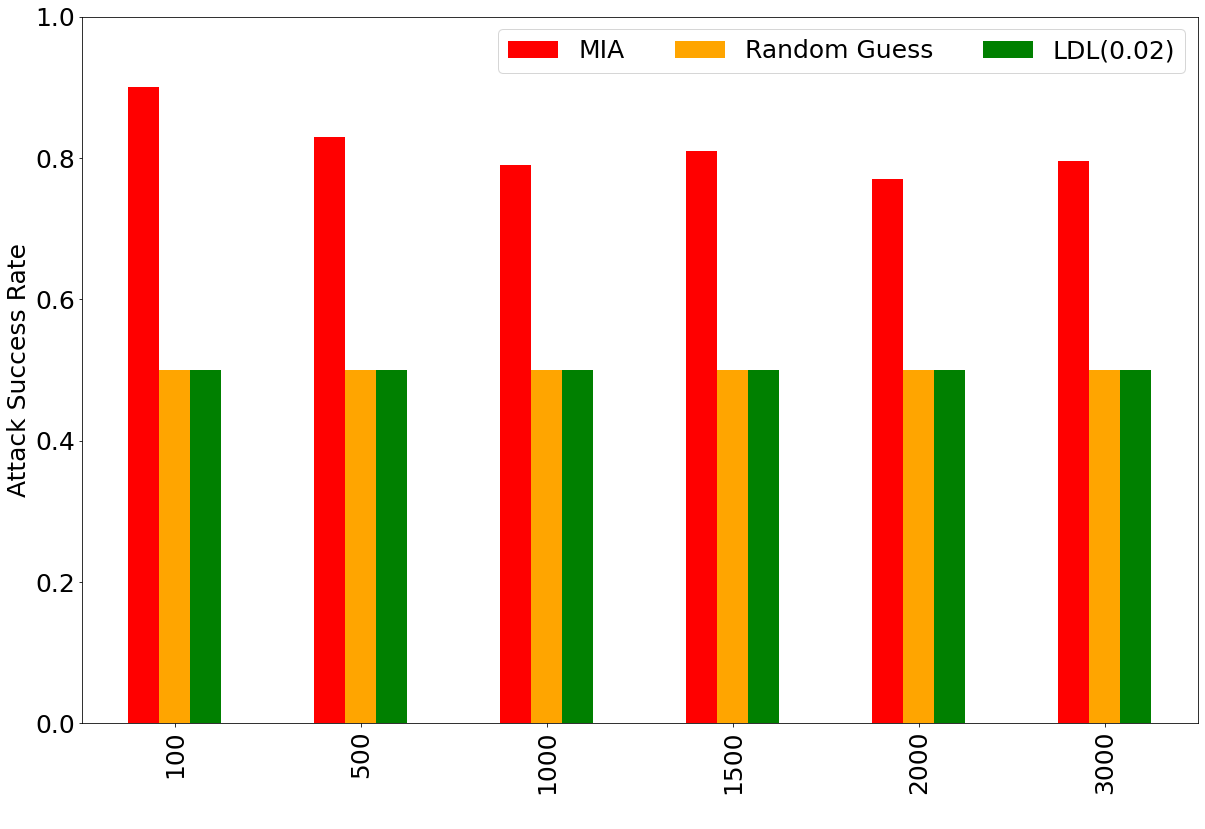

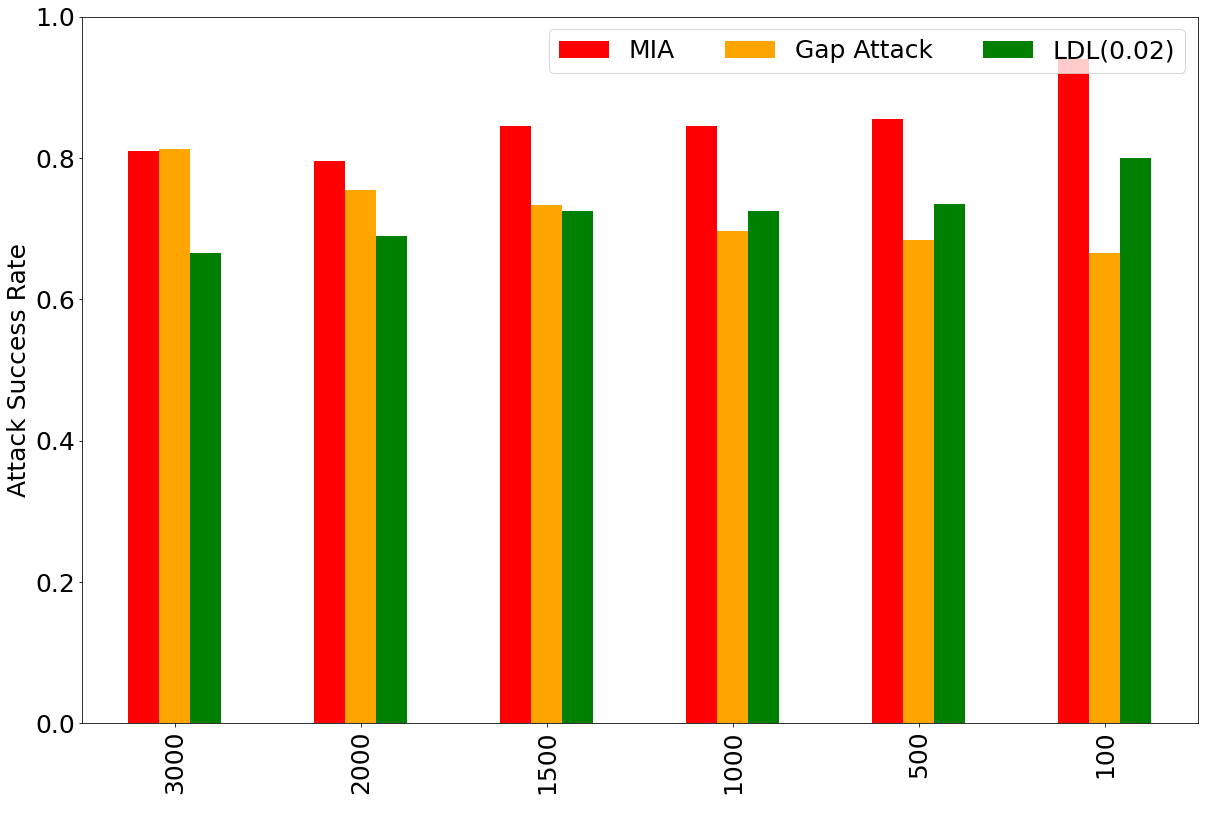

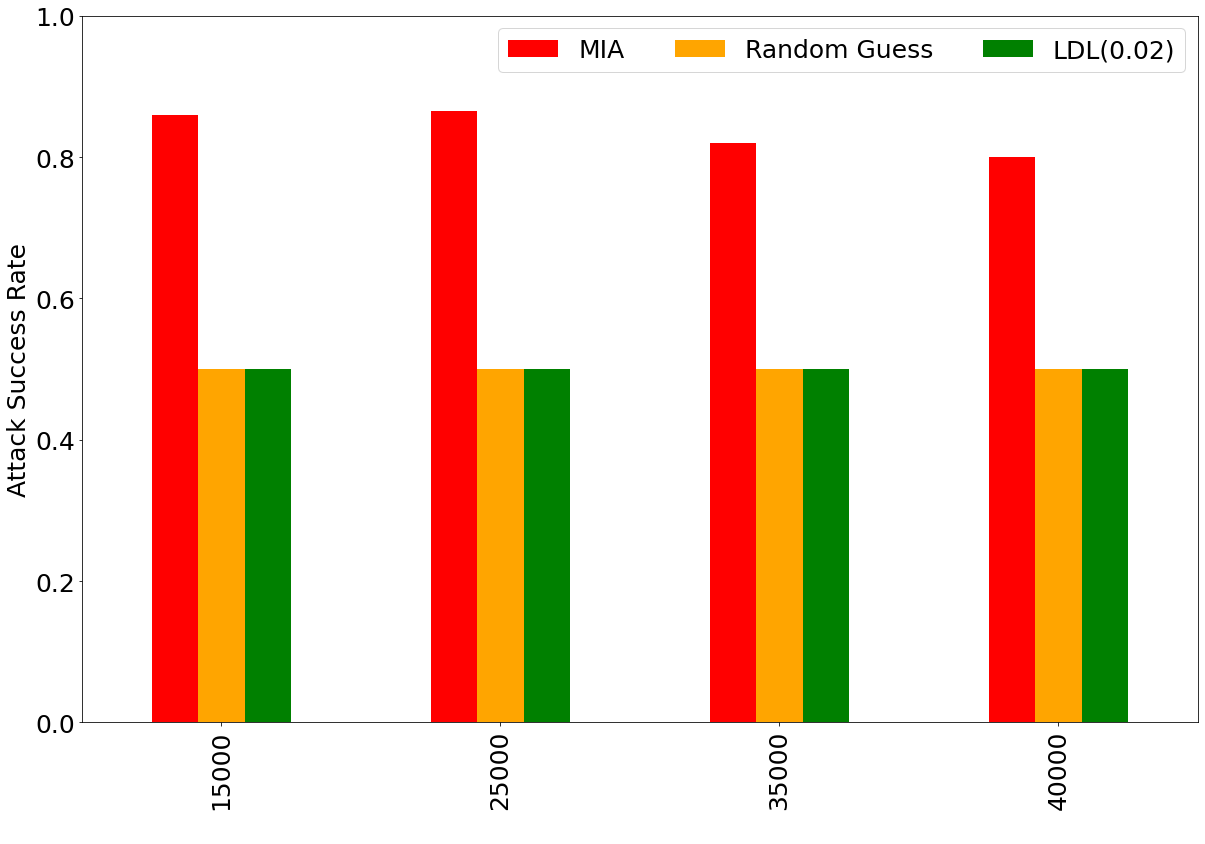

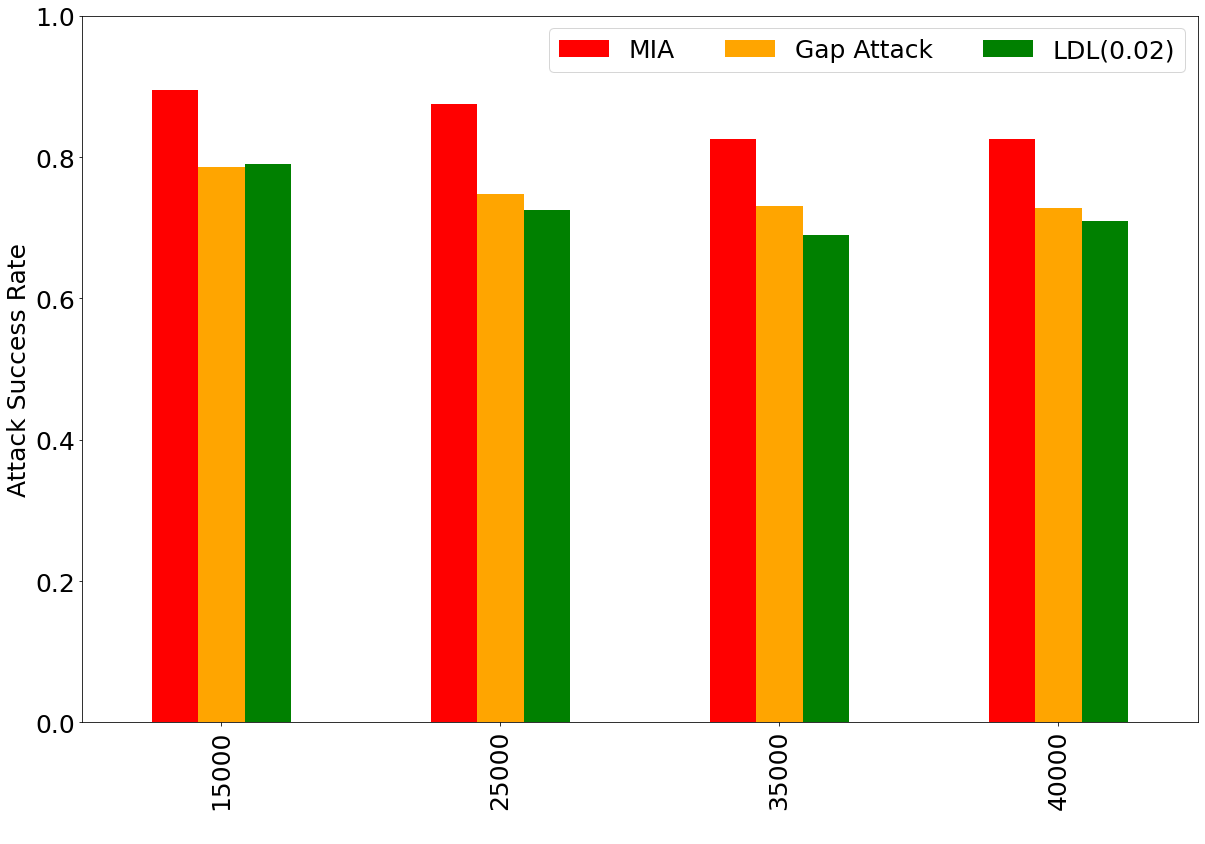

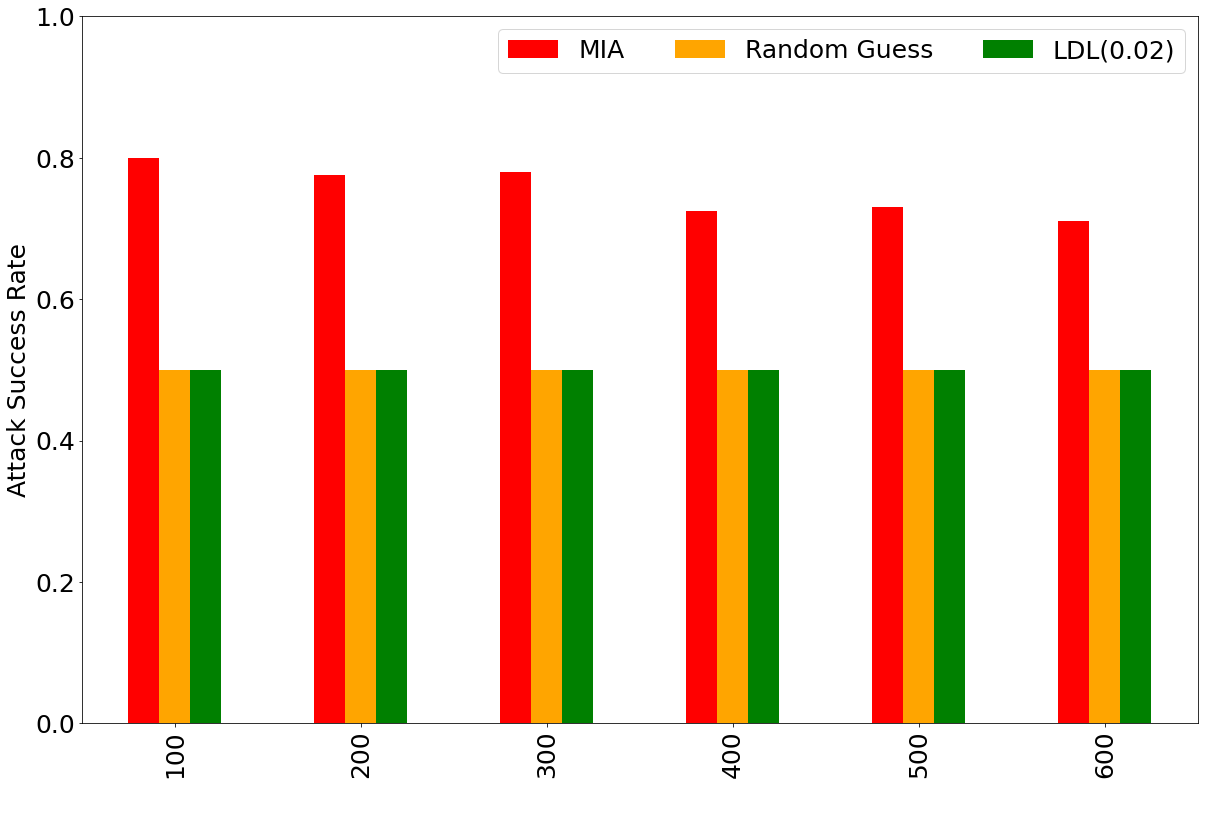

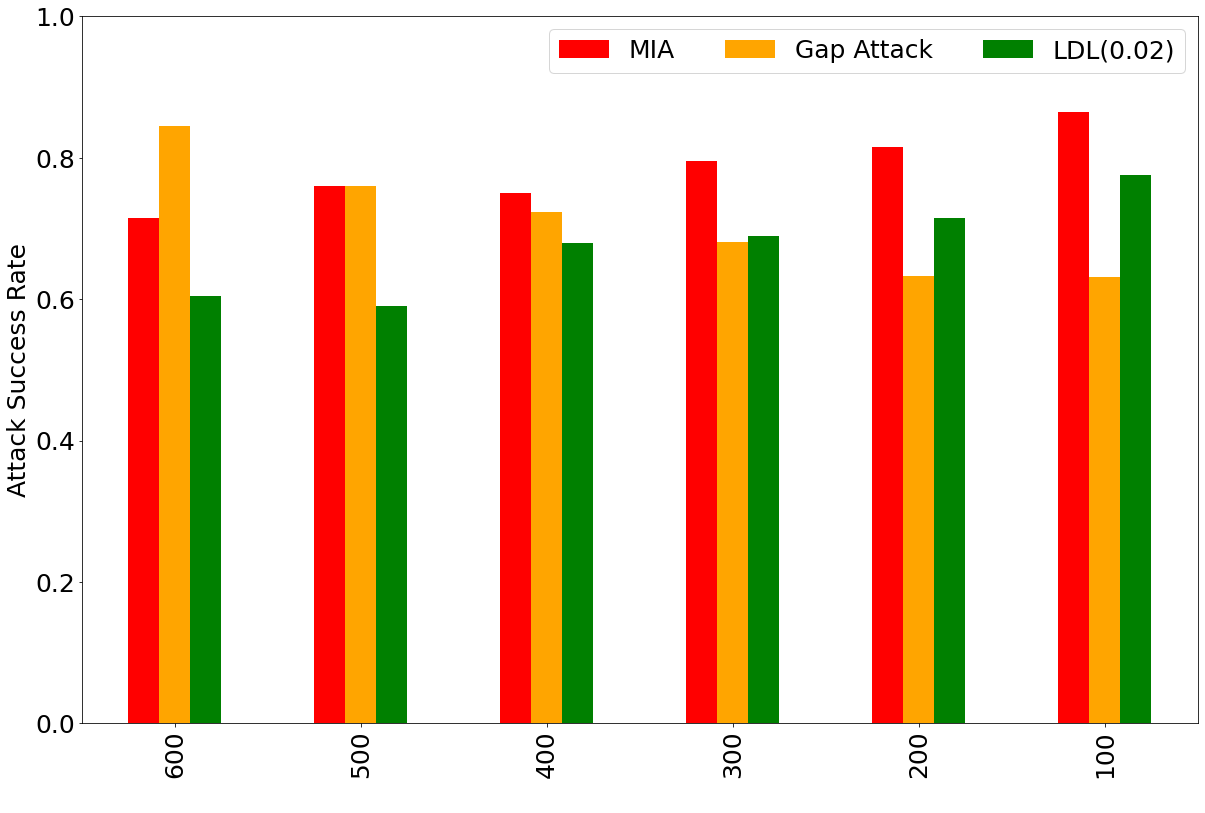

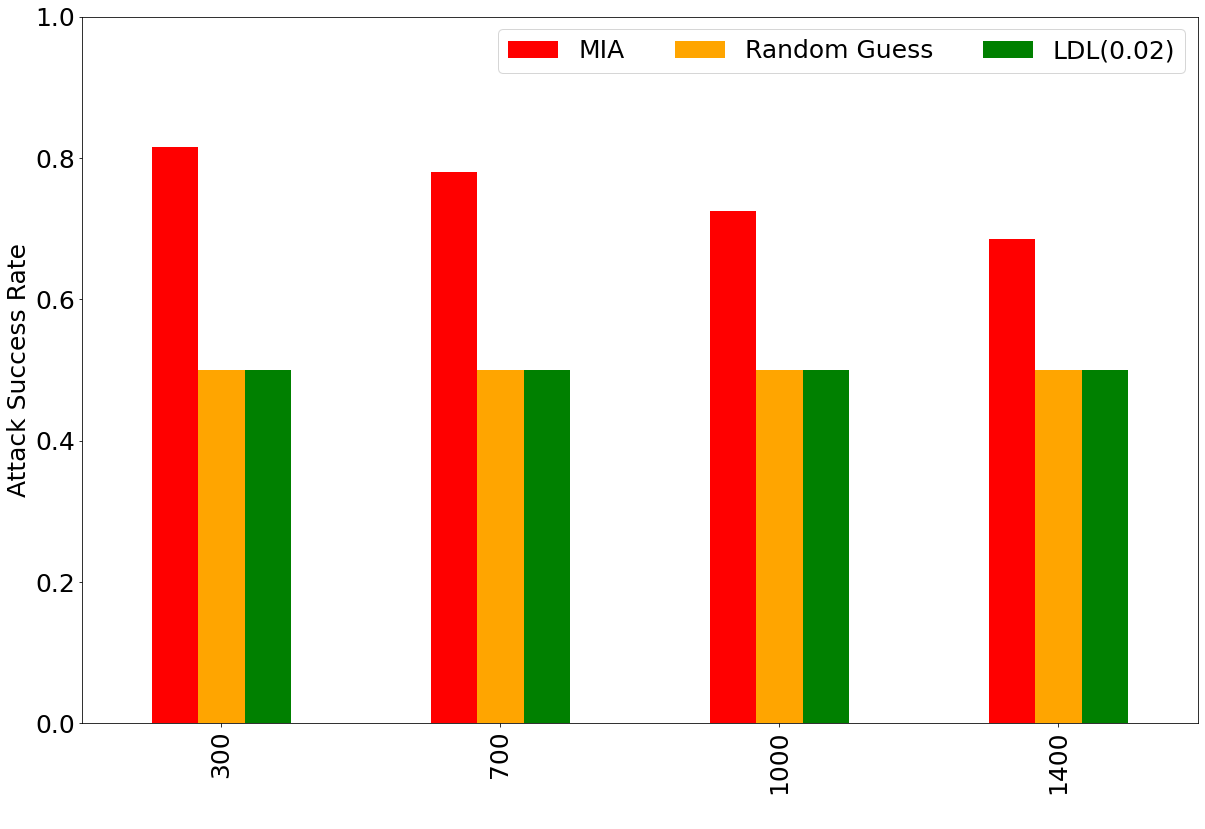

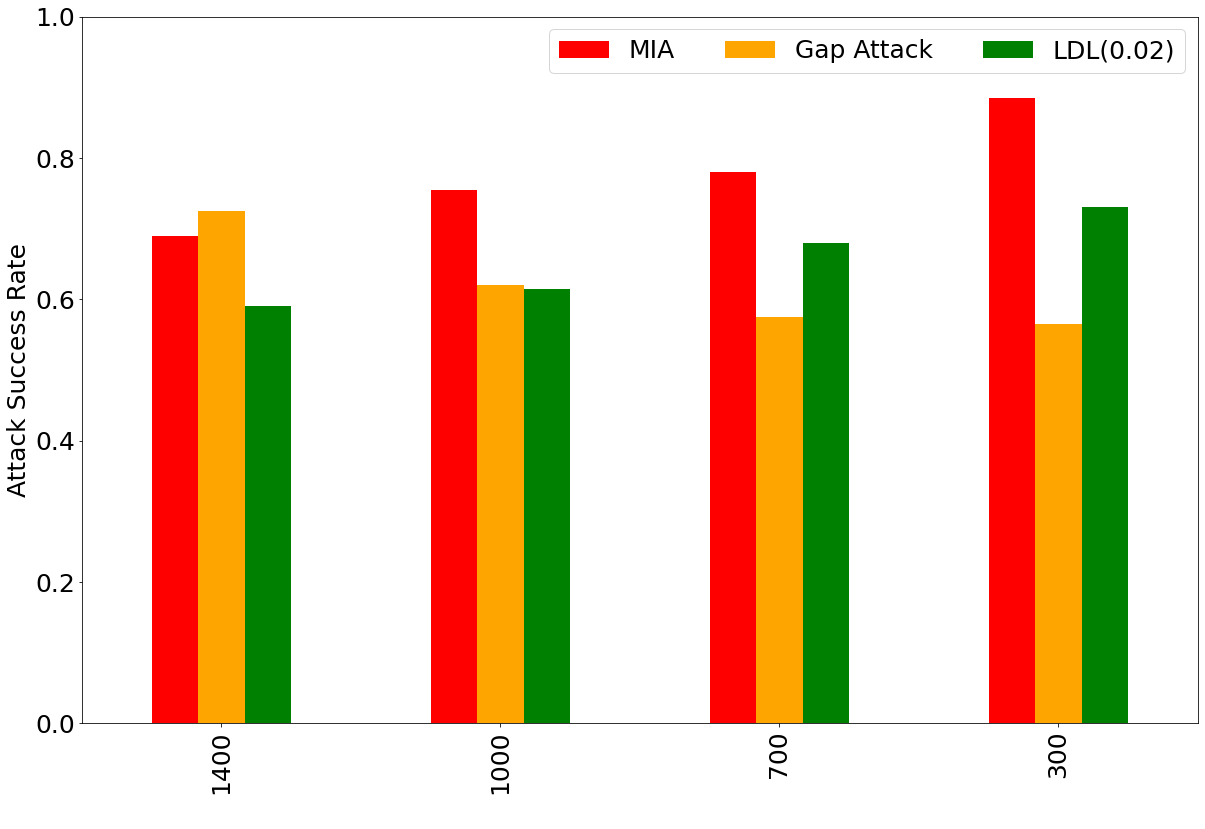

In [20]:
## CCS attack - Accuracy
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

def max_accuracy(y_true, probs):
    fpr, tpr, thresholds = roc_curve(y_true, probs)
    accuracy_scores = []
    for thresh in thresholds:
        accuracy_scores.append(accuracy_score(y_true, [m > thresh for m in probs]))

    accuracies = np.array(accuracy_scores)
    max_accuracy = accuracies.max() 
    max_accuracy_threshold =  thresholds[accuracies.argmax()]
    return max_accuracy

datsets=['CIFAR10','CIFAR100','GTSRB', 'Face']
# datasetID=0
# label_knnowledge=False

clusters=[[ 3000, 2000, 1500, 1000,500, 100],   
            [15000, 25000, 35000, 40000 ], 
            [600, 500, 400, 300, 200,100 ],      
            [1400, 1000, 700, 300  ]] 


for datasetID in [0,1,2,3]:#0,1,2,3
    filepath='results/'+datsets[datasetID]+'/target/NoDefenseaccuracy_' + str(datasetID)+'.npy'
    baseline=np.load(filepath,allow_pickle=True)
    baseline=baseline.item()
    for label_knnowledge in [False, True]:
        if label_knnowledge:
            prefix= ''
        else:
            prefix= 'WeakAdv_'
        filepath='results/'+datsets[datasetID]+'/adversaryTwo/NoDefenseDistance_'+prefix+'HopSkipJump.csv'
        data_withdefense  = pd.read_csv(filepath)

        accuracy_nodef=[]
        for cl in clusters[datasetID]:
            x=data_withdefense[data_withdefense.DataSize ==cl]
            mem=x[x.Status=='Member']['L2Distance'].to_numpy()
            if  isinstance( mem[0],str):
                mem=[float(k.replace('[','').replace(']','')) for k in mem]
            x=data_withdefense[data_withdefense.DataSize ==cl]

            nonmem=x[x.Status=='Non-member']['L2Distance'].to_numpy()

            if  isinstance( nonmem[0],str):
                nonmem=[float(k.replace('[','').replace(']','')) for k in nonmem]

            acc=max_accuracy(np.array([1]*len(mem)+[0]*len(nonmem)), np.array(list(mem)+list(nonmem)))
            accuracy_nodef.append(acc)


        filepath='results/'+datsets[datasetID]+'/adversaryTwo/Distance_'+prefix+'HopSkipJump.csv'
        data_withdefense  = pd.read_csv(filepath)

        accuracy=[]
        for cl in clusters[datasetID]:
            x=data_withdefense[data_withdefense.DataSize ==cl]
            mem=x[x.Status=='Member']['L2Distance'].to_numpy()
            if  isinstance( mem[0],str):
                mem=[float(k.replace('[','').replace(']','')) for k in mem]
            x=data_withdefense[data_withdefense.DataSize ==cl]
            nonmem=x[x.Status=='Non-member']['L2Distance'].to_numpy()
            if  isinstance( nonmem[0],str):
                nonmem=[float(k.replace('[','').replace(']','')) for k in nonmem]

            acc=max_accuracy(np.array([1]*len(mem)+[0]*len(nonmem)), np.array(list(mem)+list(nonmem)))
            accuracy.append(acc)


        if label_knnowledge:
            baseline_acc= (np.array(baseline['train_acc'])+ (1-np.array( baseline['test_acc'])))/2.0
            legends=['MIA', 'Gap Attack', 'LDL(0.02)']
        else:
            baseline_acc=[0.5]*len(baseline['train_acc'])
            legends=['MIA', 'Random Guess','LDL(0.02)']

    
        data= np.array([accuracy_nodef,accuracy ,baseline_acc]).transpose()
        if datasetID !=1:
            indx=[len(clusters[datasetID])-t-1 for t in range(len(clusters[datasetID]))]
            print(indx,data.shape  )
            data=data[indx,:]
            clusters[datasetID].reverse()
        print(data.shape)
        labels=[str(int(k)) for k in clusters[datasetID]]
        #(data, labels, Xaxis_label,pathadd, legends=['Naive','SEAD', 'Baseline']):
        plot_groupde_bar(data[:,[0,2,1]], labels, datsets[datasetID],'results/figs/CCS_ACC_'+prefix+datsets[datasetID],legends=legends)

*** ['1400', '1000', '700', '300'] (4, 4)
   Face      MIA  Gap Attack  LDL(0.02)  LDL(0.04)
0  1400  0.60500       0.565     0.5900     0.5250
1  1000  0.63140       0.575     0.6162     0.5867
2   700  0.70375       0.620     0.6963     0.5600
3   300  0.75855       0.725     0.7370     0.6250
saved to  results/figs/AUC_g_Face
*** ['1400', '1000', '700', '300'] (4, 4)
   Face    MIA  Gap Attack  LDL(0.02)  LDL(0.04)
0  1400  0.610       0.565      0.590      0.525
1  1000  0.635       0.575      0.620      0.590
2   700  0.700       0.620      0.695      0.565
3   300  0.750       0.725      0.740      0.625
saved to  results/figs/ACC_g_Face


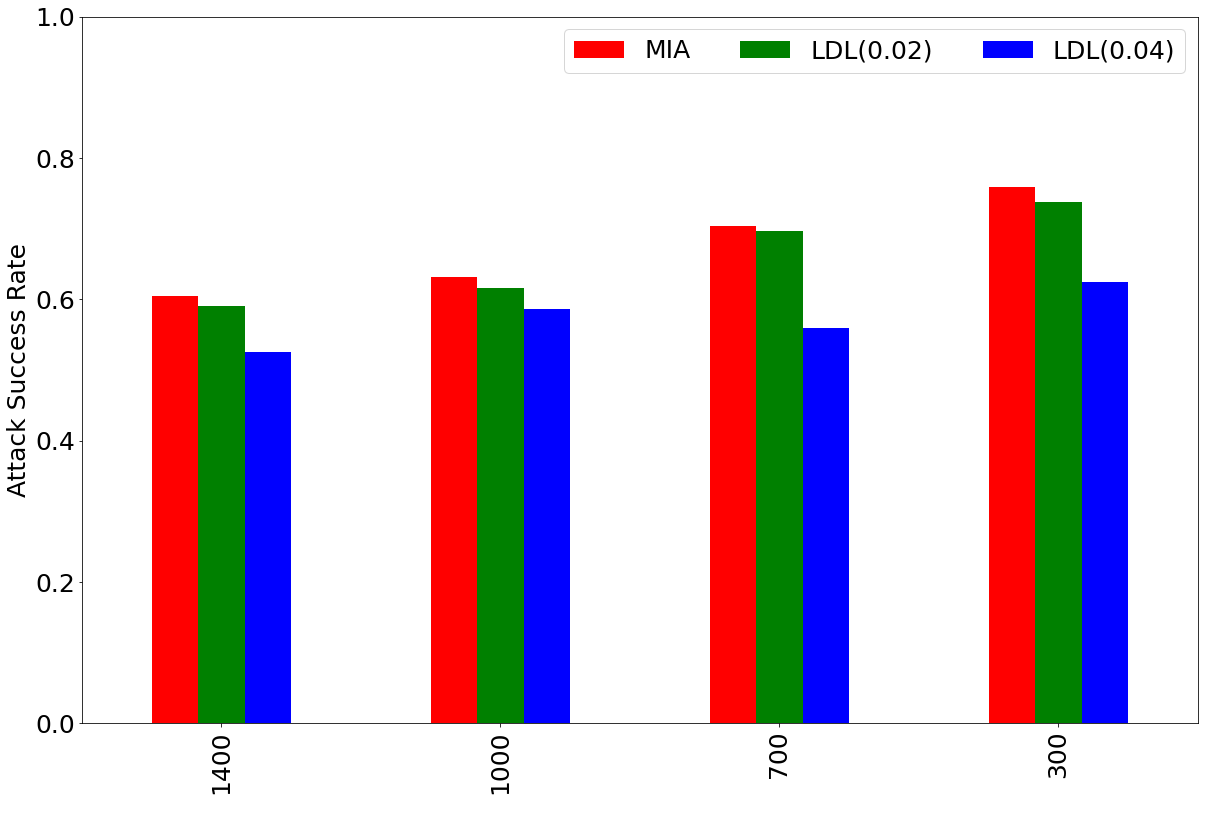

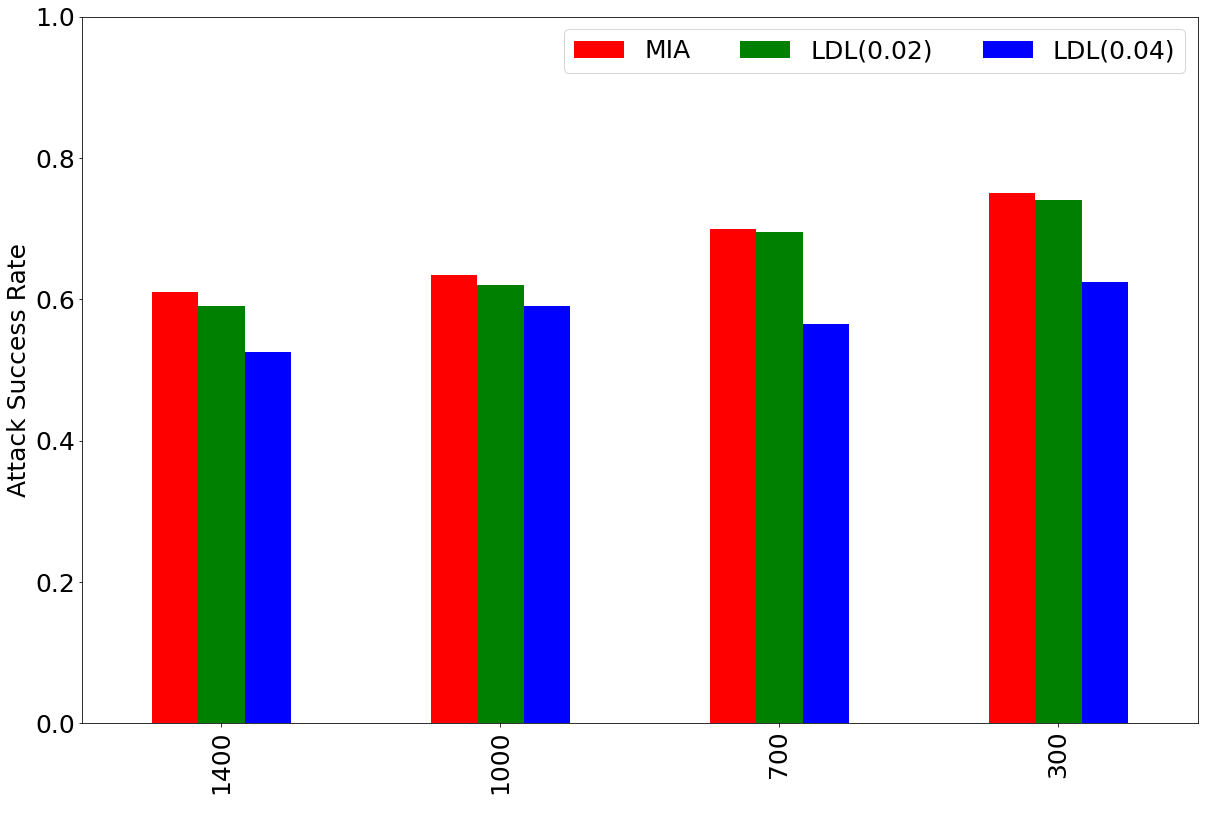

In [12]:
#### attack g (random Noise) -- AUC, ACC
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

def max_accuracy(y_true, probs):
    fpr, tpr, thresholds = roc_curve(y_true, probs)
    accuracy_scores = []
    for thresh in thresholds:
        accuracy_scores.append(accuracy_score(y_true, [m > thresh for m in probs]))

    accuracies = np.array(accuracy_scores)
    max_accuracy = accuracies.max() 
    max_accuracy_threshold =  thresholds[accuracies.argmax()]
    return max_accuracy

from sklearn.metrics import roc_auc_score, roc_curve, auc

def bestAUC(folder, cluster,pri):
    sigmas=[0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,  0.08,  0.1]
    bestAUC,bestAcc=0,0
    for sigma in sigmas:
        pathadd=folder+'data_'+pri+'g_sigma_'+str(sigma)+'_'+str(cluster)+'.npy'
        x=np.load(pathadd,allow_pickle=True)
        x=x.item()
        noise_target_in=np.array(x['noise_target_in'])
        noise_target_out=np.array(x['noise_target_out'])
        for i in range(len(noise_target_in)):
            noise_target = np.concatenate([noise_target_in[i], noise_target_out[i]], axis=0)
            y_true= np.array([1]*len(noise_target_in[i])+[0]*len(noise_target_out[i]))
            auc=roc_auc_score(y_true, noise_target)
            bestAUC= np.max([bestAUC,np.max(auc)])
            bestAcc=np.max([bestAcc,max_accuracy(y_true, noise_target)])
            
    return bestAUC, bestAcc

datsets=['CIFAR10','CIFAR100','GTSRB', 'Face']
datasetID=3
attack='g'
label_knnowledge=True
defense=True
if label_knnowledge:
    prefix= ''
else:
    prefix= 'WeakAdv_'
clusters=[[ 3000, 2000, 1500, 1000,500, 100],   
            [15000, 25000, 35000, 40000 ], 
            [600, 500, 400, 300, 200,100 ],      
            [1400, 1000, 700, 300  ]]

filepath='results/'+datsets[datasetID]+'/target/NoDefenseaccuracy_' + str(datasetID)+'.npy'
baseline=np.load(filepath,allow_pickle=True)
baseline=baseline.item()

if label_knnowledge:
    baseline_acc= (np.array(baseline['train_acc'])+ (1-np.array( baseline['test_acc'])))/2.0
    legends=['Naive','SEAD', 'Baseline']
else:
    baseline_acc=[0.5]*len(baseline['train_acc'])
    legends=['Naive','SEAD', 'Randpom Guess']

data_naive=[]
data_defense=[]
data_defense_04=[]
folder='results/'+datsets[datasetID]+'/adversaryTwo/NoDefense'
# folder='results/'+datsets[datasetID]+'/0.04/'
for cluster in clusters[datasetID]:
    n,b=bestAUC(folder, cluster,prefix)
    data_naive.append([n,b])
folder='results/'+datsets[datasetID]+'/adversaryTwo/'
for cluster in clusters[datasetID]:
    n,b=bestAUC(folder, cluster,prefix)
    data_defense.append([n,b])
    
    
folder='results/'+datsets[datasetID]+'/0.04/'
for cluster in clusters[datasetID]:
    n,b=bestAUC(folder, cluster,prefix)
    data_defense_04.append([n,b])



    
data= np.array([np.array(data_naive)[:,0], np.array(data_defense)[:,0],np.array(data_defense_04)[:,0],baseline_acc]).transpose()

if datasetID ==1:
    data=data[[3,2,1,0],:]
    clusters[1]=[40000 ,35000,25000,15000 ]
    
labels=[str(int(k)) for k in clusters[datasetID]]

plot_groupde_bar(data[:,[0,3,1,2]], labels,datsets[datasetID],'results/figs/AUC_g_'+prefix+datsets[datasetID],
                legends=['MIA','Gap Attack', 'LDL(0.02)', 'LDL(0.04)'])   

data= np.array([np.array(data_naive)[:,1], np.array(data_defense)[:,1],np.array(data_defense_04)[:,1],baseline_acc]).transpose()


if datasetID ==1:
    data=data[[3,2,1,0],:]
    clusters[1]=[40000 ,35000,25000,15000 ]
labels=[str(int(k)) for k in clusters[datasetID]]
    
plot_groupde_bar(data[:,[0,3,1,2]], labels,datsets[datasetID],'results/figs/ACC_g_'+prefix+datsets[datasetID],
                 legends=['MIA',  'Gap Attack', 'LDL(0.02)', 'LDL(0.04)'])

CIFAR10_3000 accutacy: 100.0% (67.0
CIFAR10_3000 accutacy: 97.2% (61.3

CIFAR10_2000 accutacy: 100.0% (61.6
CIFAR10_2000 accutacy: 94.0% (53.29999999999999

CIFAR10_1500 accutacy: 99.93333333333334% (59.099999999999994
CIFAR10_1500 accutacy: 96.4% (55.60000000000001

CIFAR10_1000 accutacy: 100.0% (52.7
CIFAR10_1000 accutacy: 96.2% (45.7

CIFAR10_500 accutacy: 100.0% (48.5
CIFAR10_500 accutacy: 96.0% (41.6

CIFAR10_100 accutacy: 100.0% (36.9
CIFAR10_100 accutacy: 100.0% (35.7

CIFAR100_15000 accutacy: 99.78666666666666% (41.2
CIFAR100_15000 accutacy: 89.4% (33.5

CIFAR100_25000 accutacy: 99.864% (49.3
CIFAR100_25000 accutacy: 95.252% (42.9

CIFAR100_35000 accutacy: 99.77714285714286% (51.0
CIFAR100_35000 accutacy: 91.33714285714285% (42.7

CIFAR100_40000 accutacy: 99.8775% (52.2
CIFAR100_40000 accutacy: 94.23% (45.7

GTSRB_600 accutacy: 90.0% (65.4
GTSRB_600 accutacy: 72.66666666666667% (50.6

GTSRB_500 accutacy: 95.4% (66.8
GTSRB_500 accutacy: 74.4% (46.4

GTSRB_400 accutacy: 86.75% (5

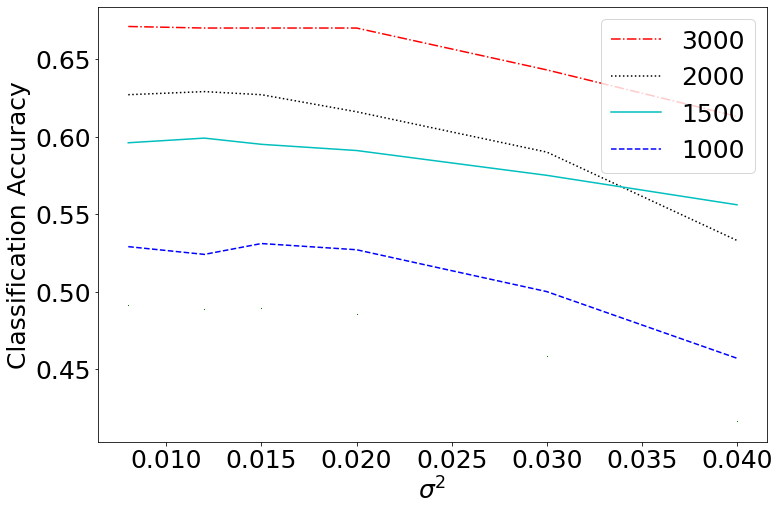

['15000', '25000', '35000', '40000']


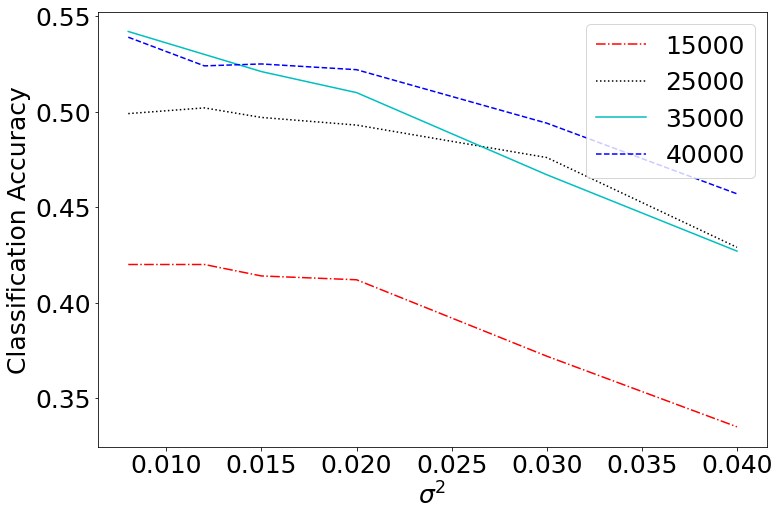

['600', '500', '400', '300', '200']


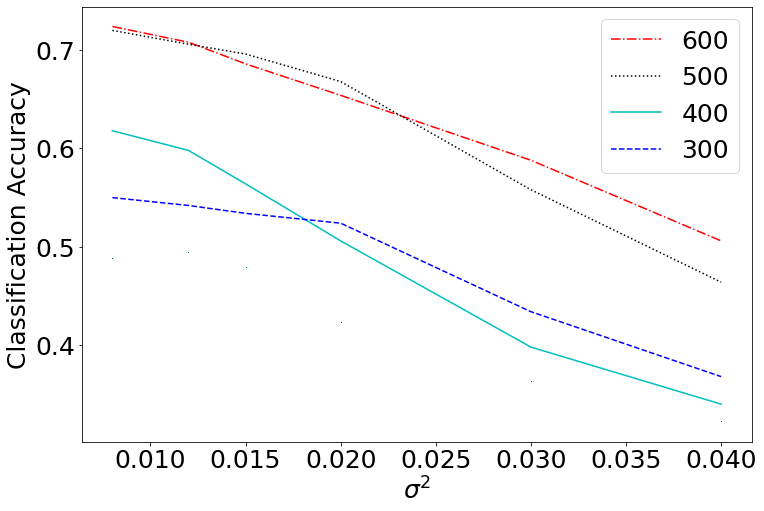

['1400', '1000', '700', '300']


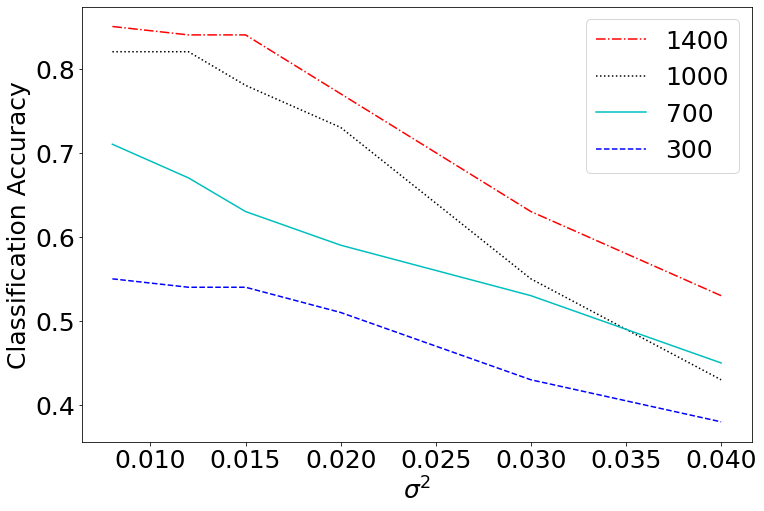

In [15]:
### Accuracy of models Changing Sigma:
# 'sigma':[0.00001, 0.004, 0.008, 0.012, 0.015, 0.02, 0.03, 0.04] 
# np.save(pathadd,{,'AUC': AUC, 'train_acc': acc_train, 'test_acc':acc_test})
#pathadd=args.logdir + '/target/sigma_' + str(args.dataset_ID)+'.npy'
import numpy as np
datsets=['CIFAR10','CIFAR100','GTSRB', 'Face']
clusters=[[ 3000, 2000, 1500, 1000,500, 100],   
            [15000, 25000, 35000, 40000 ], 
            [600, 500, 400, 300, 200,100 ],      
            [1400, 1000, 700, 300  ]]
datasetID=0
label_knnowledge = True
attack='r'
sigma=[ 0.008, 0.012, 0.015, 0.02, 0.03, 0.04]
acc,acc2=[],[]

for dataset_ID in range(4):
    pathadd= 'results/'+datsets[dataset_ID]+'/target/sigma_' + str(dataset_ID)+'.npy'
    data=np.load(pathadd,allow_pickle=True)
    data=data.item()
    acc.append(data['test_acc'])
    acc2.append(data['train_acc'])

for dataset_ID in range(4):
    acc_test=acc[dataset_ID]
    acc_train=acc2[dataset_ID]
    #acctest[sigma,cluster]
    for j,cl in enumerate(clusters[dataset_ID]):
        print(datsets[dataset_ID]+'_'+str(cl)+' accutacy: '+ str(acc_train[3,j]*100)+'% ('+str(acc_test[3,j]*100))
        print(datsets[dataset_ID]+'_'+str(cl)+' accutacy: '+ str(acc_train[5,j]*100)+'% ('+str(acc_test[5,j]*100))
        print()

    
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 25})
plt.rcParams["figure.figsize"] = (12,8)


quit()
cl2=['r-.', 'k:','c-', 'b--', 'g,', 'y.']
for dataset_ID in range(4):
    #acctest[sigma,cluster]
    acc_test=acc[dataset_ID]
    lab=[]
    plt.figure()
    for j,cl in enumerate(clusters[dataset_ID]):
        lab.append(str(cl))
        plt.plot(sigma, acc_test[:,j],cl2[j])
        if j>3:
            break
    print(lab)
    lab=lab[:4]
    plt.legend(lab, loc='upper right')
    plt.ylabel('Classification Accuracy')
    plt.xlabel(r'$\sigma^2$')
    
    plt.savefig('results/figs/'+datsets[dataset_ID]+'_ACC_SigmaDefense.png', dpi=700)
    plt.savefig('results/figs/'+datsets[dataset_ID]+'_ACC_SigmaDefense.pdf', dpi=700)
    plt.show()

(6, 4, 9)
[[[0.95 0.64 0.35 0.2  0.14 0.05 0.04 0.03 0.03]
  [0.94 0.74 0.4  0.25 0.14 0.06 0.04 0.03 0.04]
  [0.84 0.73 0.49 0.33 0.21 0.1  0.05 0.04 0.04]
  [0.66 0.61 0.49 0.35 0.24 0.12 0.07 0.04 0.05]]

 [[0.89 0.64 0.42 0.23 0.12 0.03 0.02 0.04 0.04]
  [0.88 0.73 0.46 0.28 0.16 0.04 0.03 0.04 0.05]
  [0.76 0.69 0.55 0.4  0.24 0.07 0.06 0.05 0.07]
  [0.56 0.54 0.4  0.33 0.3  0.16 0.08 0.08 0.09]]

 [[0.87 0.61 0.37 0.25 0.2  0.02 0.01 0.01 0.01]
  [0.88 0.74 0.49 0.31 0.22 0.02 0.01 0.01 0.01]
  [0.77 0.73 0.67 0.38 0.27 0.08 0.03 0.03 0.03]
  [0.64 0.61 0.53 0.42 0.36 0.15 0.05 0.04 0.03]]

 [[0.94 0.55 0.39 0.25 0.17 0.05 0.02 0.02 0.04]
  [0.9  0.68 0.43 0.31 0.21 0.1  0.03 0.03 0.04]
  [0.73 0.63 0.5  0.4  0.29 0.1  0.06 0.05 0.05]
  [0.59 0.54 0.46 0.41 0.38 0.18 0.12 0.11 0.1 ]]

 [[0.92 0.68 0.41 0.23 0.13 0.06 0.04 0.07 0.08]
  [0.89 0.71 0.51 0.31 0.2  0.08 0.06 0.07 0.09]
  [0.72 0.65 0.53 0.4  0.31 0.15 0.11 0.12 0.13]
  [0.59 0.54 0.49 0.4  0.34 0.21 0.17 0.15 0.15]]



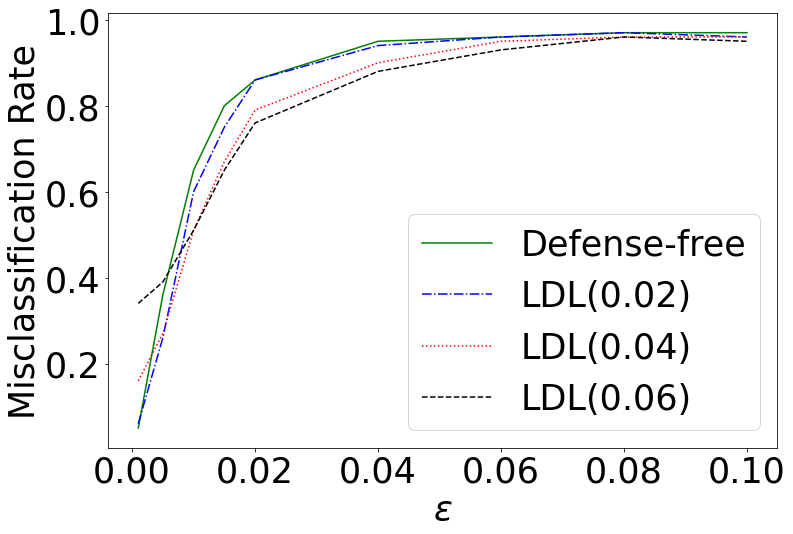

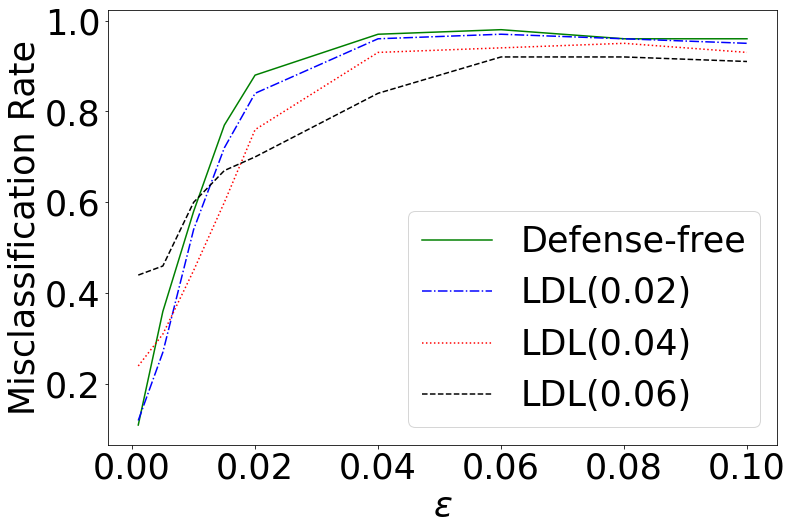

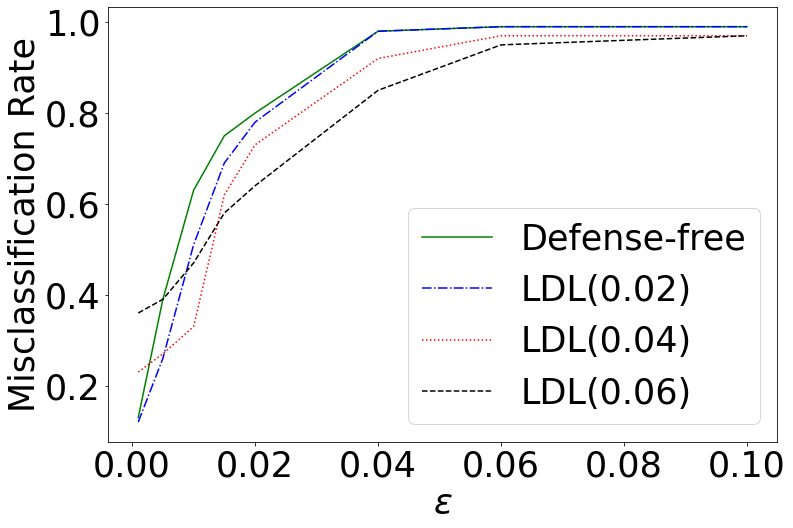

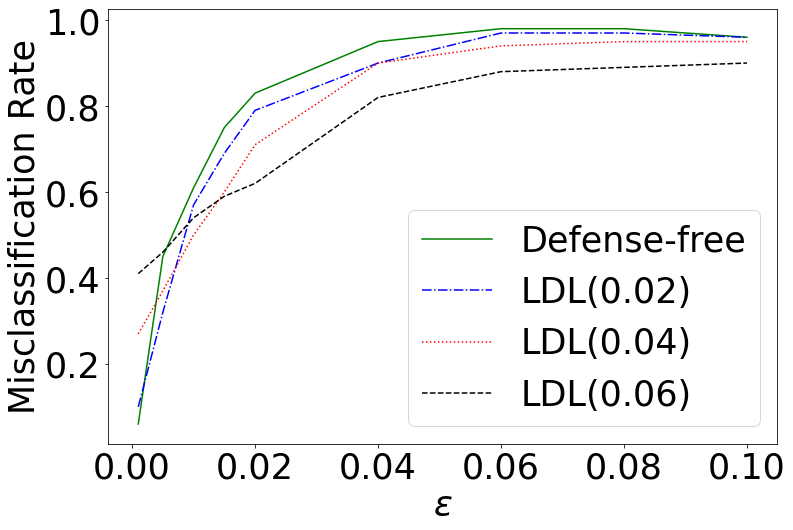

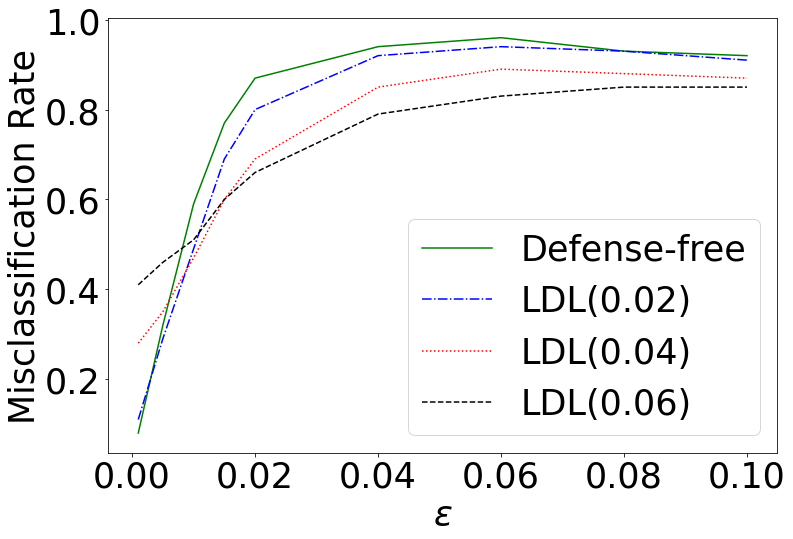

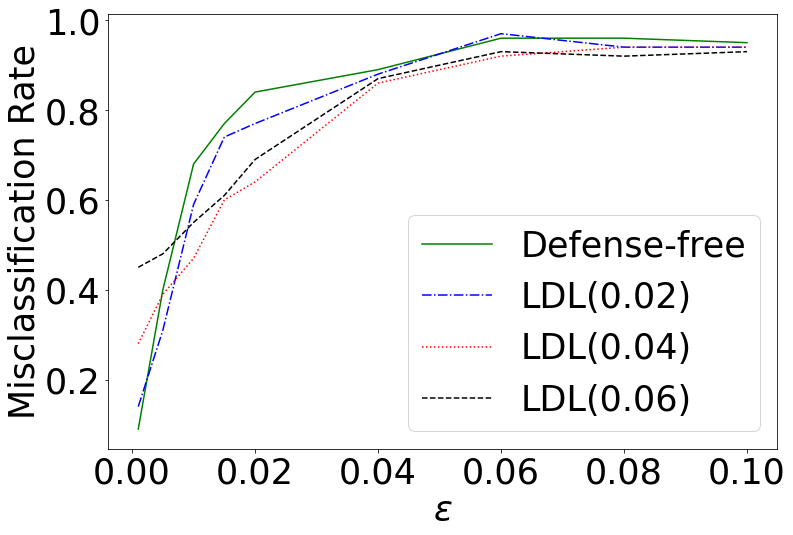

(4, 4, 9)
[[[0.72 0.24 0.09 0.05 0.05 0.03 0.   0.   0.  ]
  [0.78 0.35 0.11 0.07 0.05 0.02 0.   0.   0.  ]
  [0.67 0.44 0.23 0.13 0.06 0.01 0.   0.   0.  ]
  [0.5  0.39 0.25 0.17 0.11 0.01 0.01 0.   0.  ]]

 [[0.72 0.25 0.18 0.14 0.13 0.03 0.03 0.03 0.03]
  [0.79 0.35 0.22 0.14 0.13 0.04 0.03 0.04 0.03]
  [0.71 0.49 0.29 0.2  0.16 0.07 0.03 0.05 0.04]
  [0.64 0.46 0.32 0.25 0.19 0.1  0.05 0.06 0.04]]

 [[0.6  0.26 0.17 0.11 0.09 0.07 0.04 0.03 0.03]
  [0.64 0.32 0.21 0.14 0.1  0.07 0.05 0.04 0.03]
  [0.63 0.38 0.25 0.19 0.14 0.08 0.06 0.05 0.04]
  [0.46 0.36 0.27 0.22 0.16 0.09 0.08 0.05 0.05]]

 [[0.69 0.27 0.17 0.13 0.11 0.05 0.04 0.04 0.03]
  [0.74 0.32 0.22 0.17 0.12 0.05 0.04 0.04 0.03]
  [0.68 0.41 0.27 0.2  0.15 0.08 0.06 0.05 0.03]
  [0.51 0.38 0.3  0.22 0.17 0.1  0.08 0.05 0.05]]]


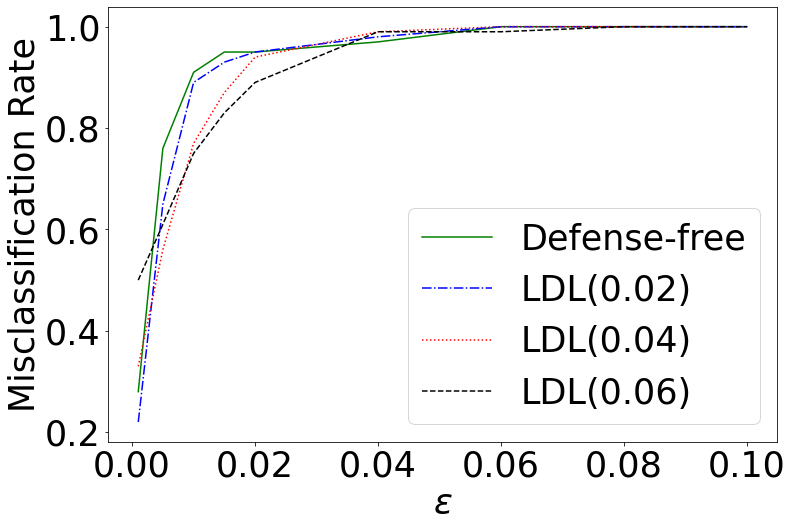

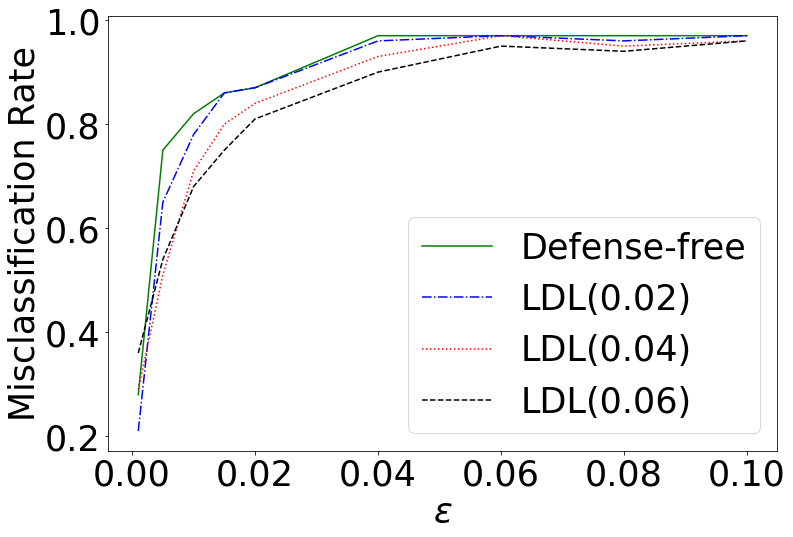

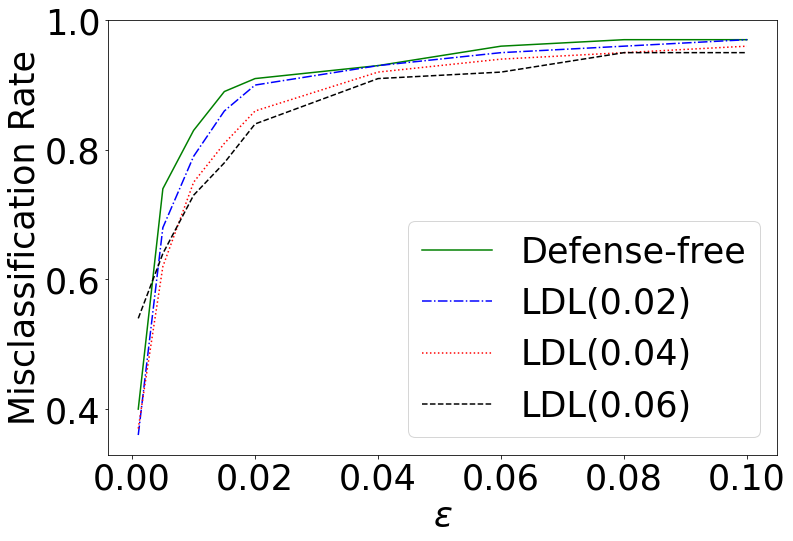

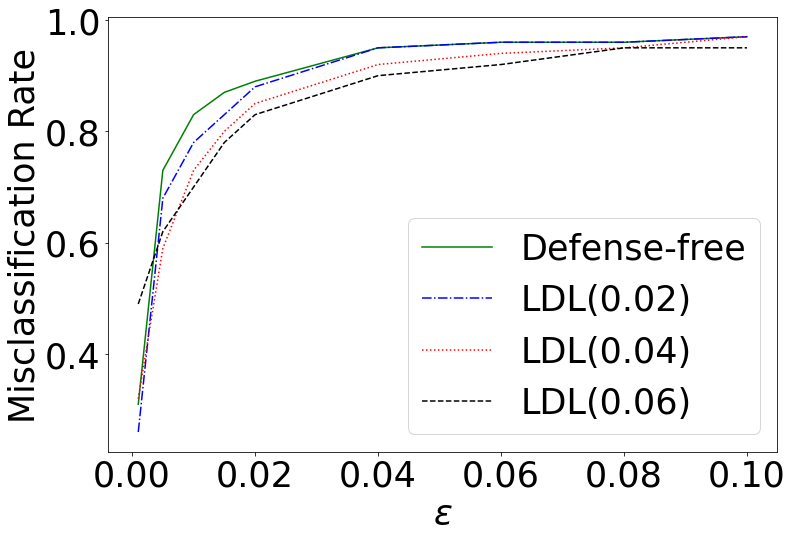

(6, 4, 9)
[[[0.94 0.63 0.31 0.17 0.15 0.06 0.04 0.03 0.02]
  [0.84 0.71 0.44 0.25 0.18 0.07 0.04 0.03 0.02]
  [0.6  0.55 0.41 0.29 0.23 0.09 0.04 0.03 0.01]
  [0.43 0.34 0.29 0.2  0.17 0.09 0.04 0.04 0.02]]

 [[0.94 0.59 0.29 0.17 0.11 0.07 0.07 0.03 0.04]
  [0.86 0.7  0.47 0.23 0.15 0.08 0.07 0.04 0.04]
  [0.66 0.59 0.5  0.32 0.21 0.11 0.08 0.05 0.05]
  [0.47 0.42 0.37 0.27 0.18 0.11 0.1  0.07 0.06]]

 [[0.89 0.63 0.3  0.21 0.15 0.1  0.07 0.06 0.06]
  [0.69 0.54 0.41 0.3  0.23 0.1  0.07 0.07 0.06]
  [0.48 0.42 0.37 0.28 0.21 0.1  0.07 0.08 0.06]
  [0.3  0.27 0.23 0.21 0.2  0.11 0.08 0.06 0.05]]

 [[0.83 0.46 0.29 0.18 0.16 0.1  0.08 0.03 0.02]
  [0.82 0.62 0.39 0.26 0.21 0.11 0.08 0.03 0.02]
  [0.6  0.51 0.39 0.3  0.25 0.11 0.07 0.03 0.02]
  [0.39 0.36 0.3  0.25 0.22 0.11 0.04 0.02 0.01]]

 [[0.89 0.56 0.3  0.22 0.19 0.06 0.02 0.01 0.  ]
  [0.76 0.58 0.44 0.27 0.22 0.06 0.02 0.01 0.01]
  [0.58 0.51 0.4  0.33 0.3  0.1  0.02 0.02 0.01]
  [0.48 0.46 0.37 0.33 0.26 0.13 0.07 0.03 0.02]]



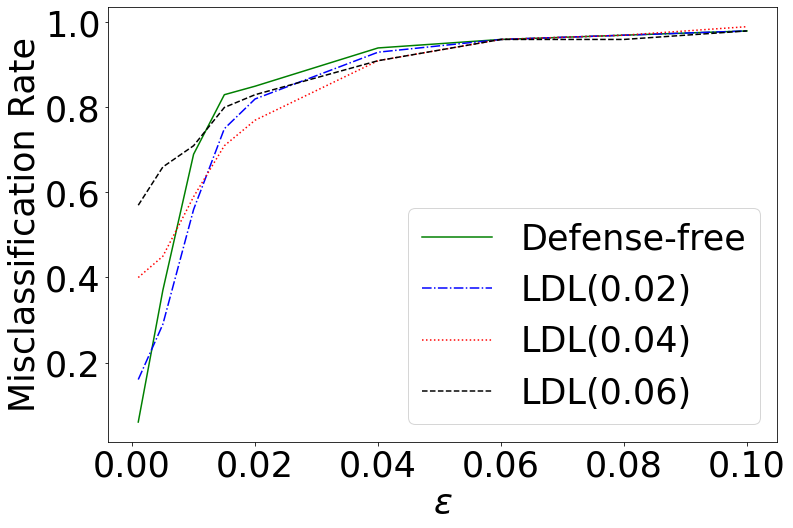

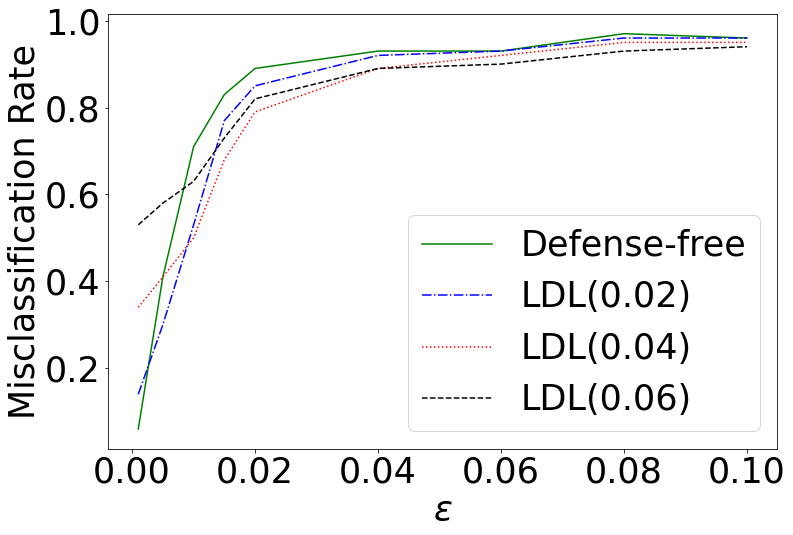

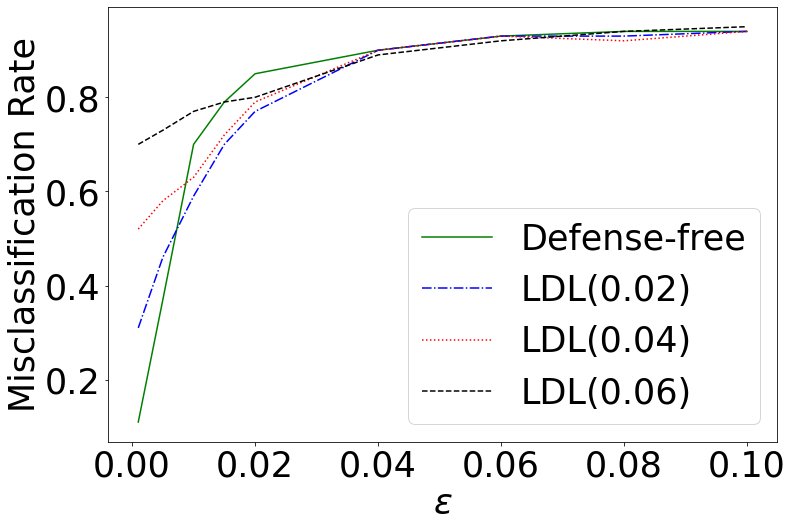

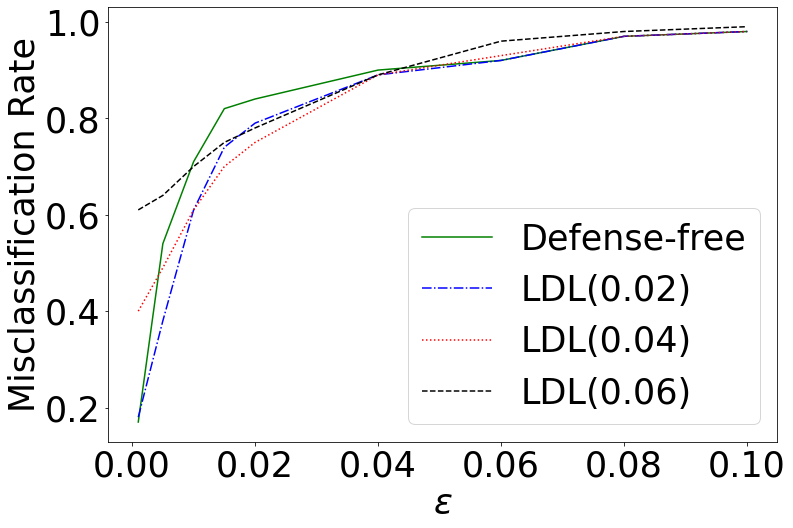

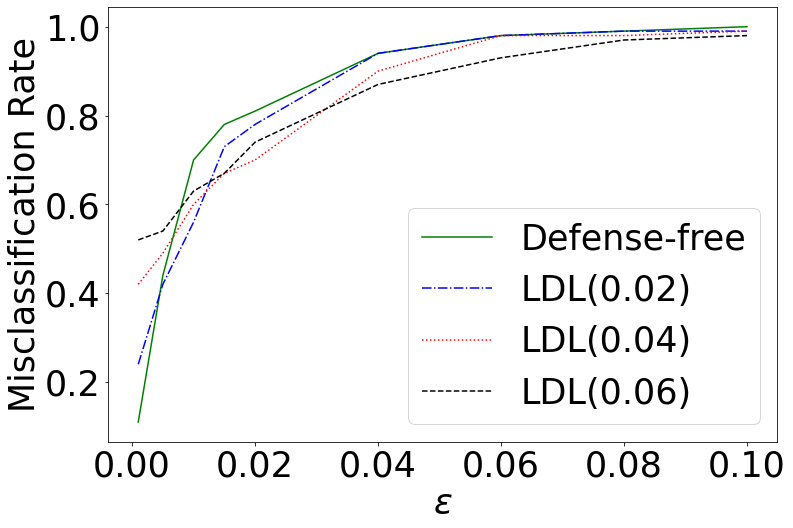

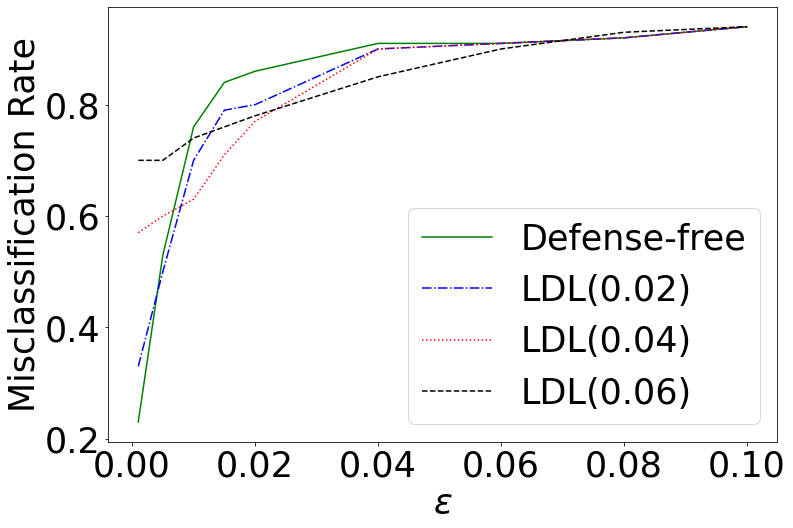

(4, 4, 9)
[[[0.93103448 0.42528736 0.16091954 0.09195402 0.06896552 0.06896552
   0.05747126 0.04597701 0.03448276]
  [0.85057471 0.63218391 0.40229885 0.24137931 0.12643678 0.09195402
   0.04597701 0.04597701 0.03448276]
  [0.56321839 0.51724138 0.4137931  0.31034483 0.20689655 0.06896552
   0.04597701 0.04597701 0.03448276]
  [0.33333333 0.28735632 0.22988506 0.17241379 0.09195402 0.04597701
   0.04597701 0.03448276 0.04597701]]

 [[0.78823529 0.35294118 0.10588235 0.05882353 0.03529412 0.04705882
   0.04705882 0.03529412 0.02352941]
  [0.8        0.54117647 0.29411765 0.10588235 0.05882353 0.04705882
   0.04705882 0.03529412 0.02352941]
  [0.45882353 0.38823529 0.36470588 0.24705882 0.15294118 0.04705882
   0.03529412 0.02352941 0.02352941]
  [0.37647059 0.29411765 0.18823529 0.10588235 0.07058824 0.05882353
   0.03529412 0.02352941 0.02352941]]

 [[0.81578947 0.40789474 0.14473684 0.09210526 0.05263158 0.03947368
   0.         0.01315789 0.01315789]
  [0.72368421 0.57894737 0.34210

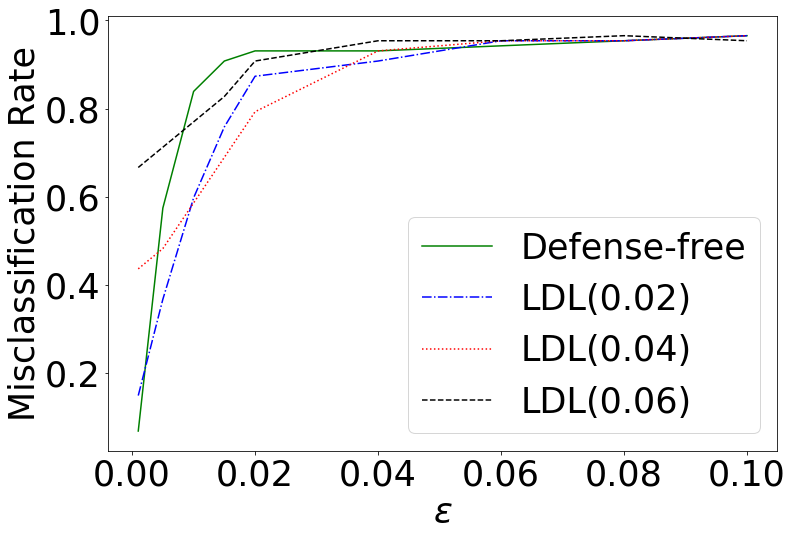

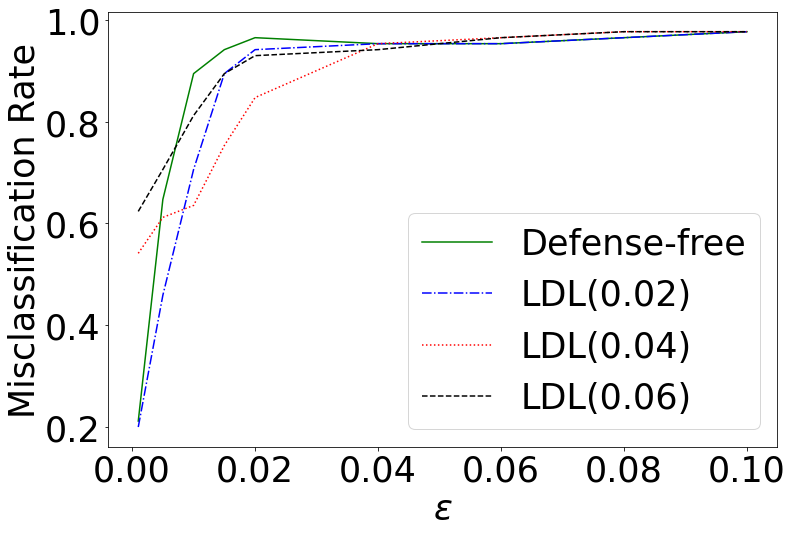

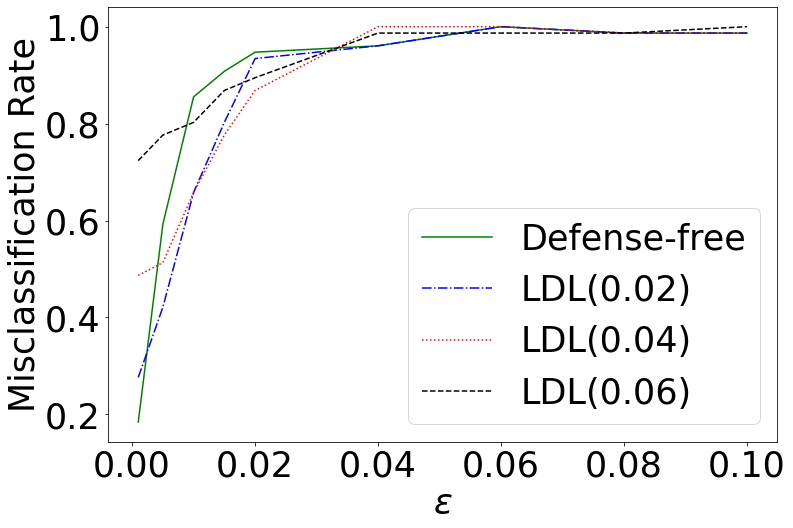

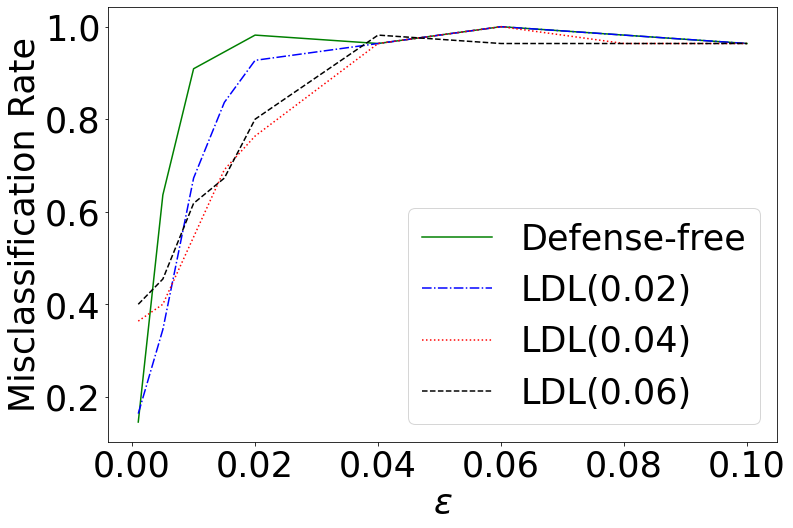

(6, 4, 9)
[[[1.   0.99 0.7  0.34 0.2  0.08 0.03 0.03 0.04]
  [1.   1.   0.81 0.38 0.26 0.08 0.03 0.04 0.04]
  [0.94 0.89 0.77 0.59 0.37 0.11 0.04 0.04 0.05]
  [0.79 0.75 0.66 0.59 0.46 0.17 0.11 0.08 0.09]]

 [[1.   1.   0.73 0.4  0.22 0.07 0.04 0.06 0.08]
  [1.   0.99 0.76 0.5  0.28 0.08 0.05 0.07 0.08]
  [0.91 0.84 0.7  0.59 0.43 0.16 0.09 0.08 0.09]
  [0.7  0.6  0.53 0.5  0.4  0.22 0.13 0.12 0.11]]

 [[1.   1.   0.89 0.5  0.29 0.04 0.03 0.03 0.04]
  [1.   0.99 0.91 0.63 0.4  0.07 0.04 0.03 0.05]
  [0.94 0.92 0.79 0.68 0.53 0.11 0.05 0.05 0.07]
  [0.81 0.75 0.67 0.59 0.53 0.21 0.1  0.07 0.07]]

 [[1.   1.   0.87 0.63 0.38 0.12 0.07 0.05 0.05]
  [1.   0.99 0.86 0.69 0.47 0.15 0.09 0.05 0.05]
  [0.95 0.92 0.78 0.65 0.56 0.21 0.1  0.08 0.06]
  [0.72 0.68 0.65 0.62 0.56 0.23 0.14 0.09 0.09]]

 [[1.   1.   0.98 0.9  0.58 0.15 0.11 0.09 0.09]
  [1.   1.   0.97 0.9  0.68 0.16 0.11 0.09 0.1 ]
  [0.96 0.92 0.84 0.77 0.62 0.22 0.15 0.11 0.1 ]
  [0.76 0.7  0.64 0.58 0.56 0.27 0.18 0.11 0.11]]



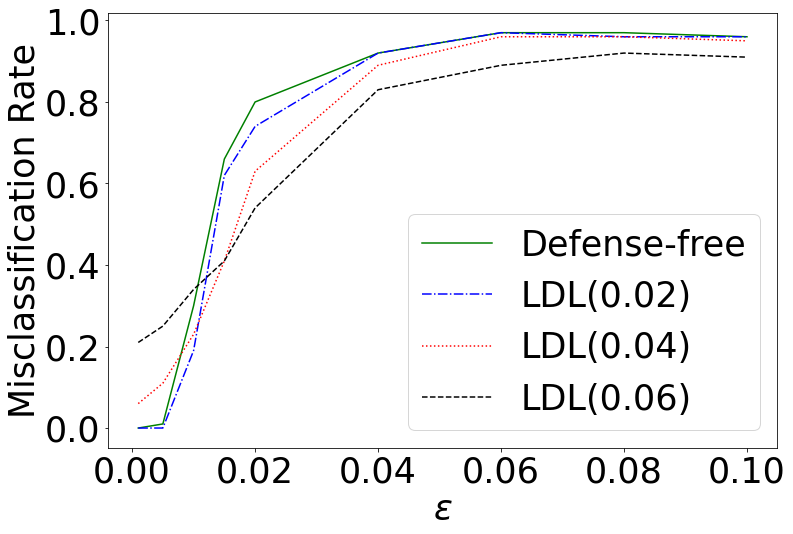

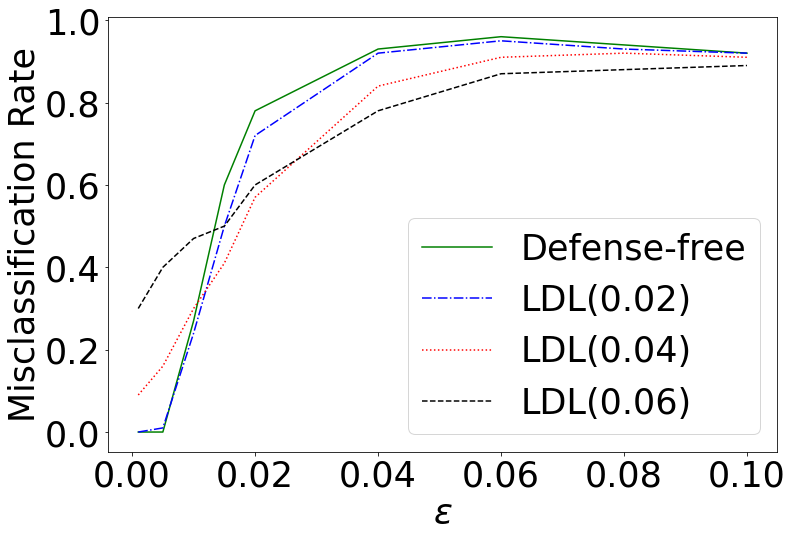

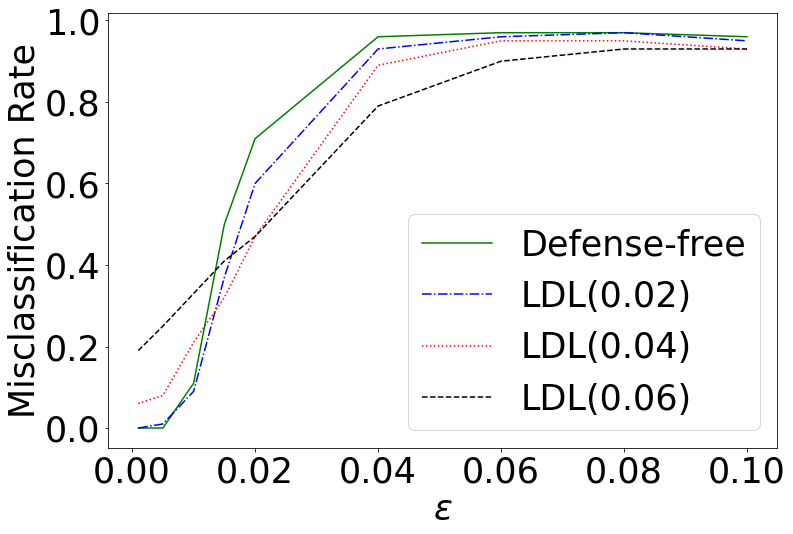

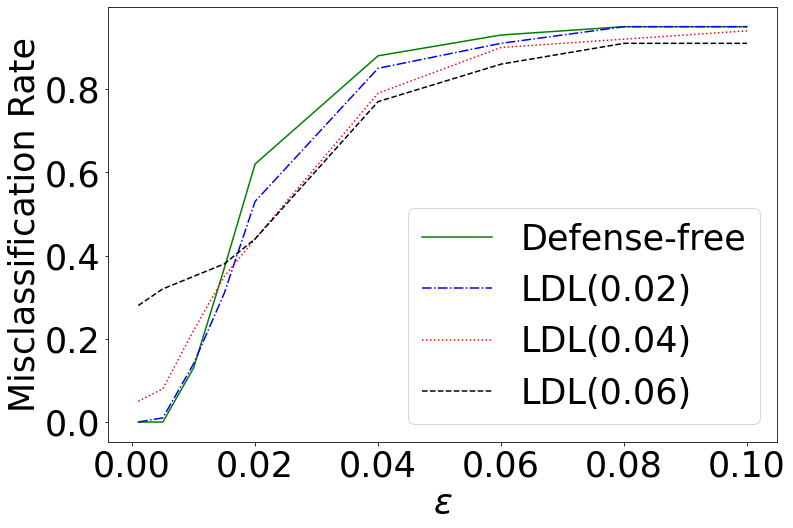

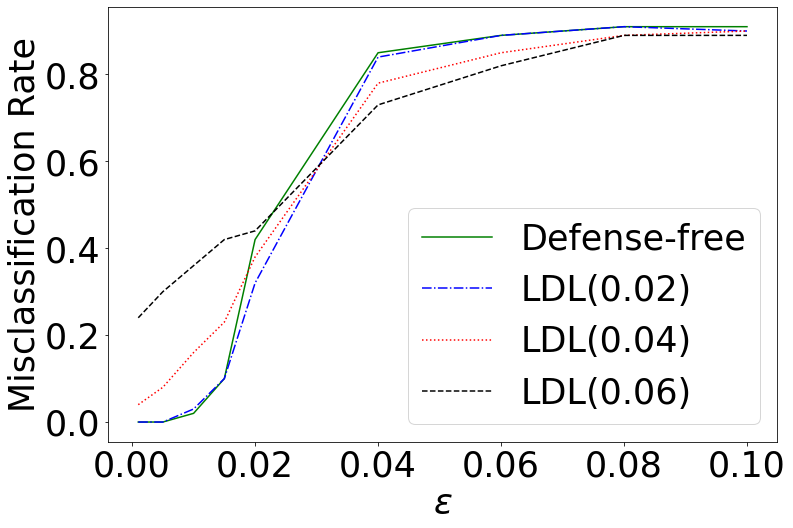

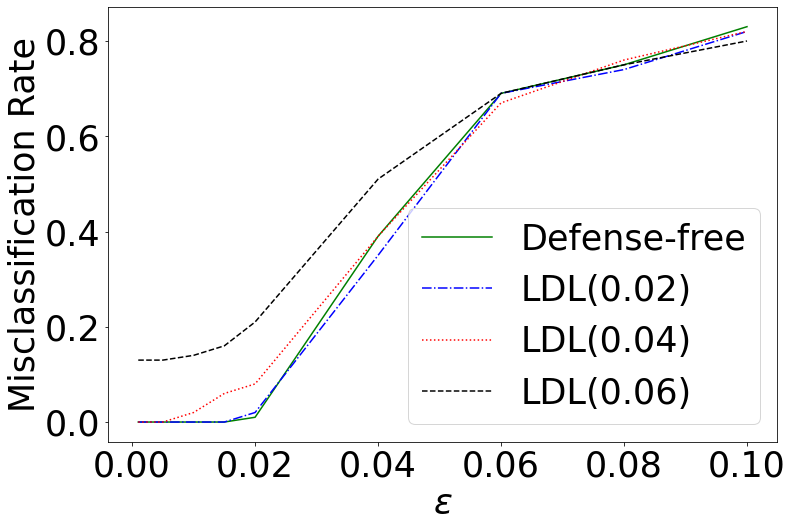

(4, 4, 9)
[[[1.   0.8  0.3  0.14 0.11 0.07 0.04 0.01 0.  ]
  [1.   0.91 0.39 0.19 0.12 0.07 0.04 0.   0.  ]
  [0.91 0.75 0.48 0.31 0.16 0.05 0.04 0.   0.  ]
  [0.59 0.47 0.35 0.27 0.18 0.06 0.03 0.   0.  ]]

 [[1.   0.73 0.48 0.38 0.28 0.11 0.08 0.08 0.08]
  [1.   0.83 0.55 0.4  0.3  0.11 0.08 0.07 0.09]
  [0.98 0.86 0.68 0.46 0.36 0.15 0.09 0.09 0.09]
  [0.79 0.7  0.57 0.46 0.35 0.15 0.12 0.11 0.09]]

 [[1.   0.73 0.48 0.3  0.21 0.1  0.09 0.05 0.05]
  [0.98 0.8  0.55 0.35 0.24 0.1  0.09 0.05 0.05]
  [0.88 0.74 0.61 0.43 0.35 0.14 0.1  0.05 0.04]
  [0.63 0.61 0.53 0.44 0.33 0.19 0.09 0.07 0.06]]

 [[1.   0.64 0.43 0.31 0.24 0.12 0.06 0.06 0.08]
  [1.   0.75 0.51 0.36 0.27 0.12 0.06 0.06 0.09]
  [0.93 0.78 0.57 0.44 0.31 0.14 0.12 0.09 0.11]
  [0.7  0.62 0.5  0.45 0.38 0.16 0.12 0.12 0.11]]]


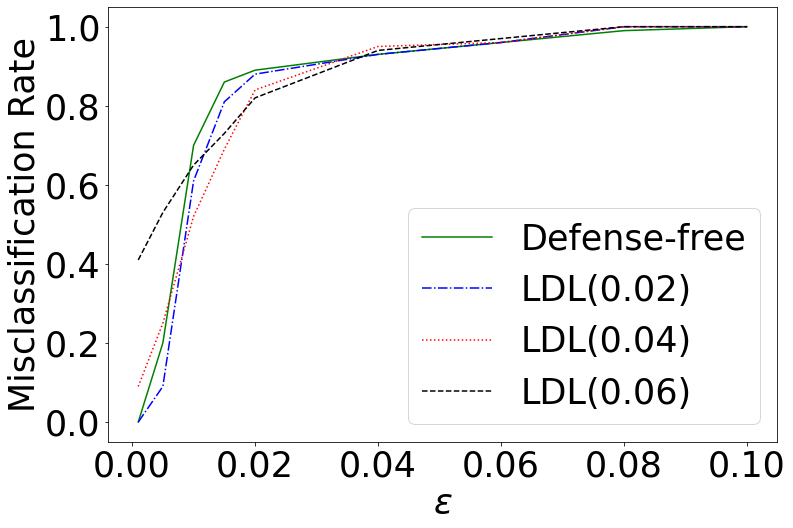

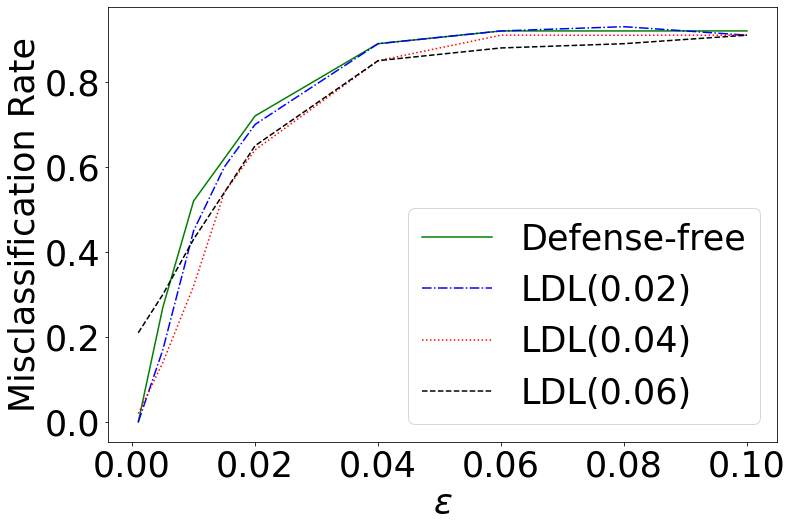

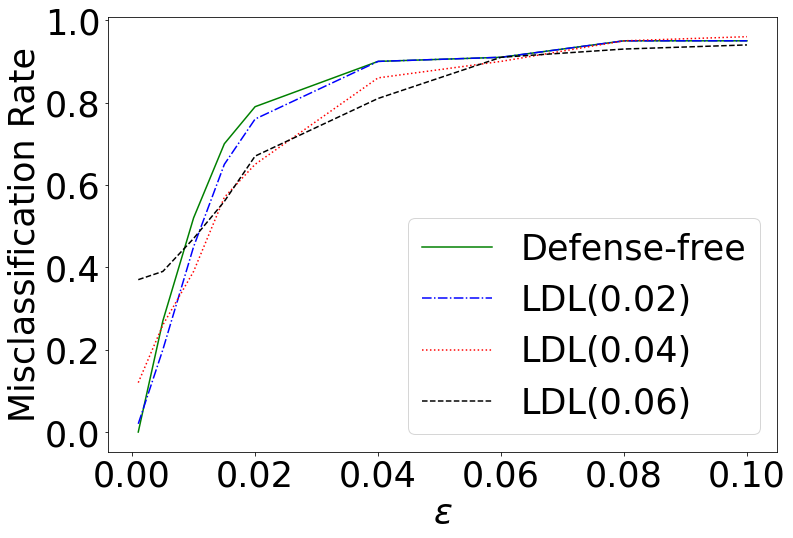

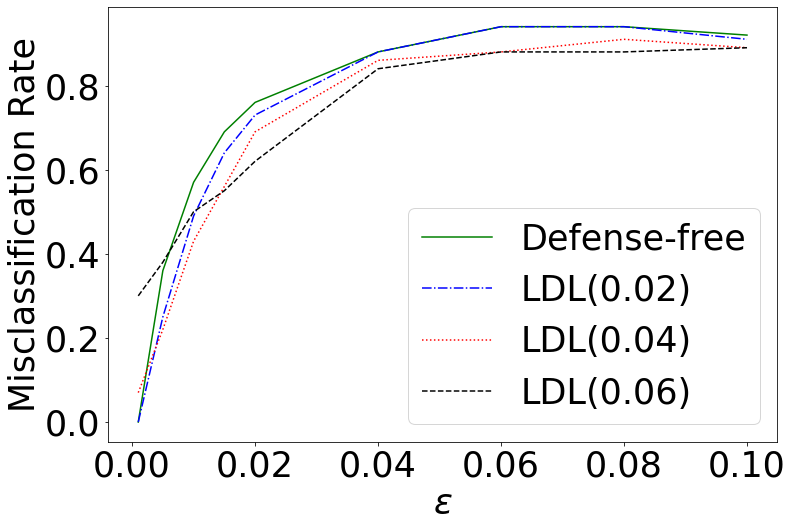

(6, 4, 9)
[[[1.         0.9        0.71       0.48       0.36       0.16
   0.04       0.01       0.02      ]
  [0.91       0.84       0.73       0.55       0.44       0.17
   0.05       0.02       0.03      ]
  [0.69       0.62       0.59       0.51       0.46       0.17
   0.08       0.02       0.04      ]
  [0.49       0.45       0.44       0.41       0.33       0.12
   0.05       0.03       0.05      ]]

 [[1.         0.89       0.68       0.47       0.28       0.08
   0.04       0.04       0.04      ]
  [0.9        0.83       0.72       0.5        0.35       0.1
   0.06       0.05       0.05      ]
  [0.72       0.68       0.57       0.46       0.38       0.13
   0.08       0.07       0.06      ]
  [0.46       0.42       0.33       0.28       0.25       0.11
   0.09       0.07       0.05      ]]

 [[1.         0.95       0.73       0.51       0.38       0.16
   0.08       0.04       0.02      ]
  [0.9        0.79       0.65       0.47       0.42       0.16
   0.07       0.04      

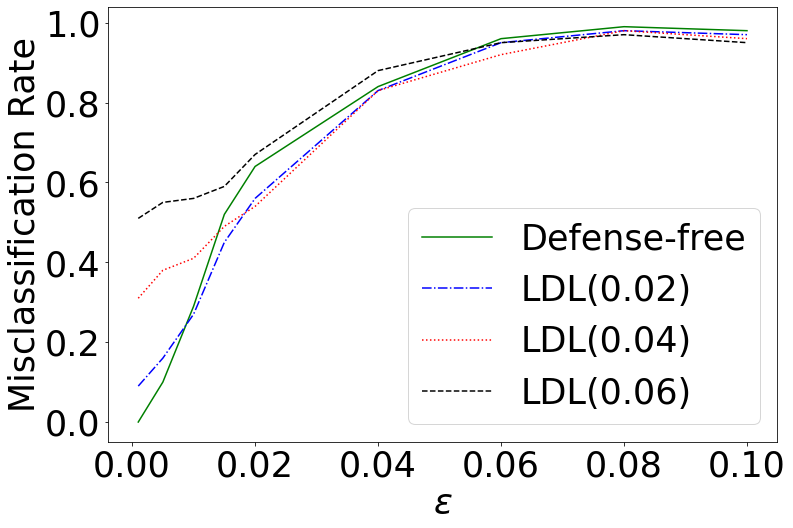

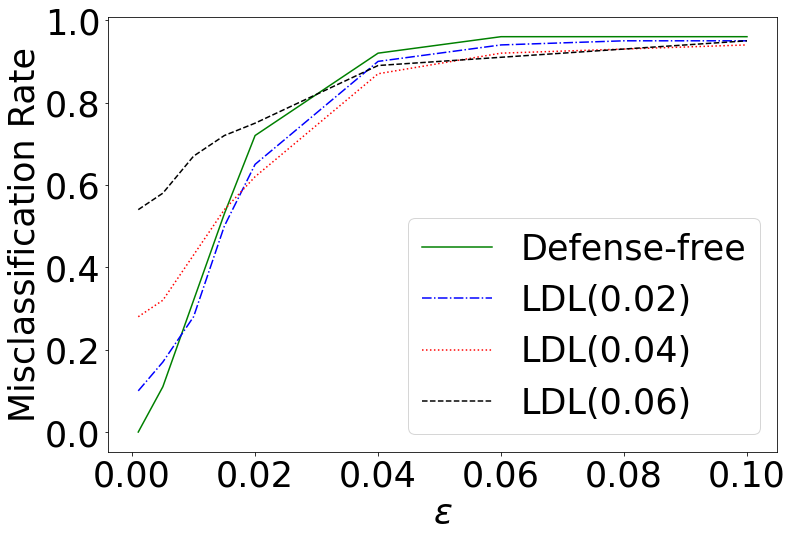

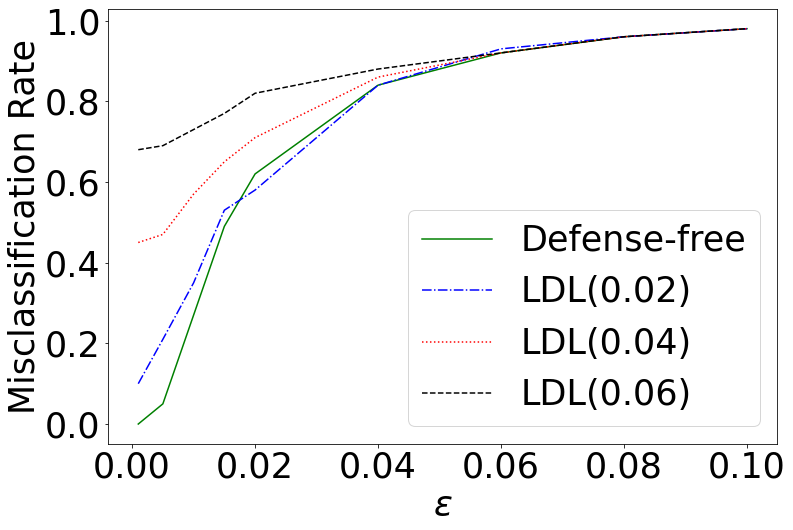

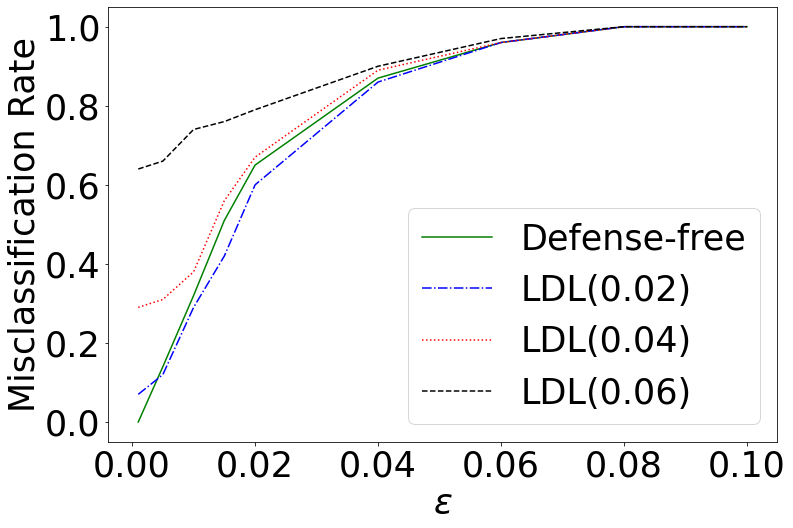

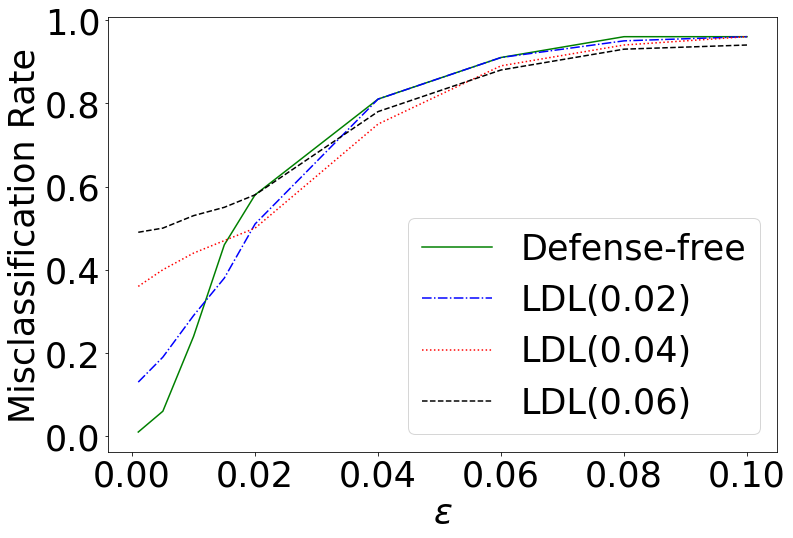

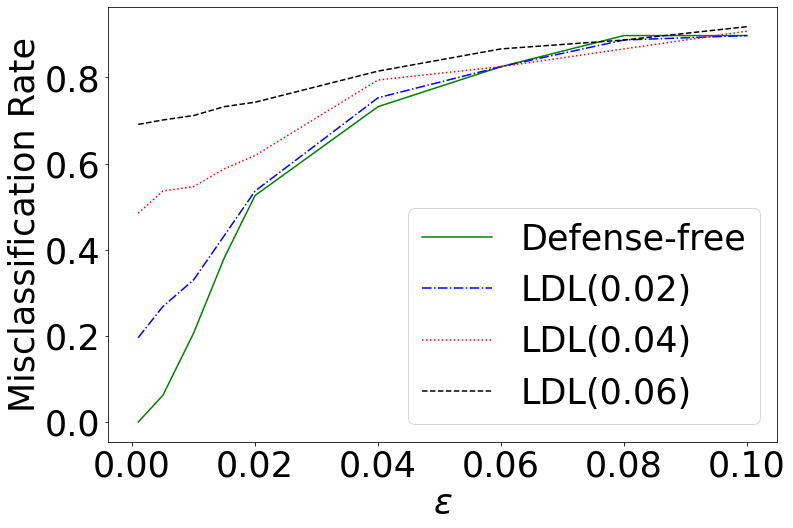

(4, 4, 9)
[[[1.   0.81 0.26 0.13 0.09 0.08 0.03 0.01 0.01]
  [0.92 0.72 0.46 0.3  0.22 0.08 0.03 0.01 0.01]
  [0.52 0.49 0.37 0.28 0.22 0.06 0.01 0.01 0.01]
  [0.29 0.26 0.19 0.17 0.1  0.02 0.01 0.01 0.01]]

 [[1.   0.82 0.2  0.06 0.05 0.02 0.   0.   0.  ]
  [0.92 0.68 0.45 0.2  0.08 0.02 0.   0.   0.  ]
  [0.59 0.54 0.32 0.23 0.13 0.02 0.   0.   0.  ]
  [0.33 0.3  0.21 0.13 0.06 0.   0.   0.   0.01]]

 [[1.   0.86 0.26 0.11 0.06 0.05 0.02 0.01 0.01]
  [0.95 0.81 0.44 0.22 0.12 0.05 0.01 0.01 0.01]
  [0.53 0.42 0.27 0.16 0.08 0.03 0.01 0.01 0.01]
  [0.18 0.14 0.09 0.09 0.05 0.02 0.01 0.01 0.01]]

 [[1.   0.97 0.57 0.25 0.09 0.02 0.   0.02 0.04]
  [0.96 0.86 0.67 0.36 0.2  0.03 0.   0.02 0.04]
  [0.62 0.52 0.45 0.38 0.31 0.03 0.03 0.04 0.04]
  [0.44 0.41 0.36 0.27 0.23 0.05 0.06 0.05 0.04]]]


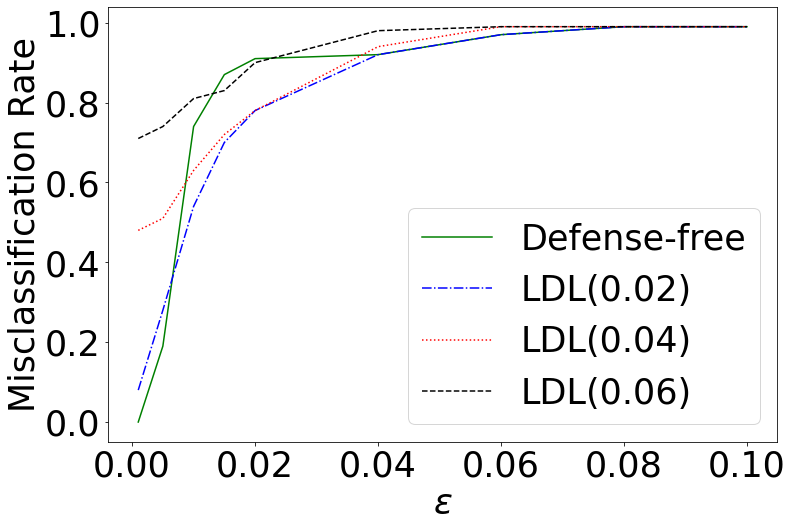

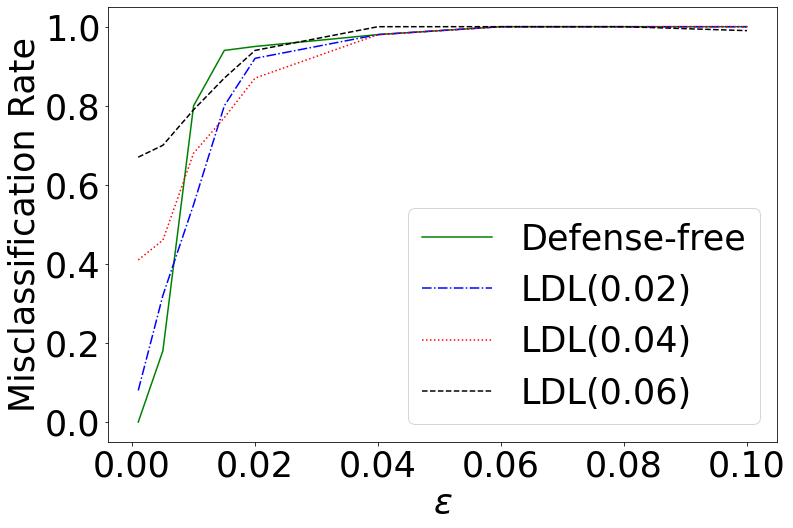

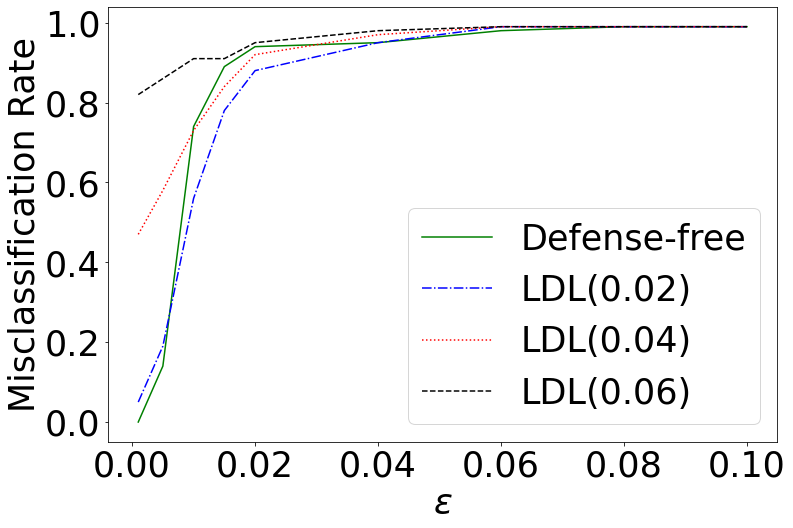

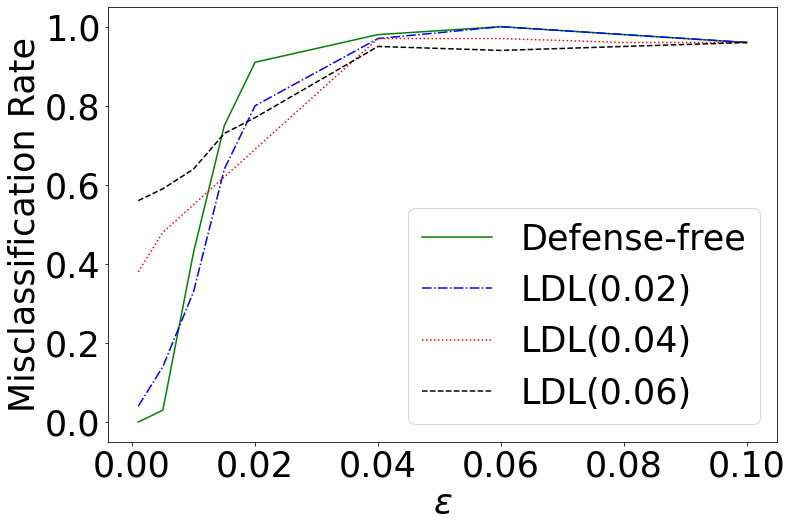

In [59]:

#### FGS Attacks Figures


datsets=['CIFAR10','CIFAR100','GTSRB', 'Face']
eps_list=[0.001, 0.005, 0.01, 0.015, 0.02, 0.04, 0.06 , 0.08, 0.1]
data=[]
data_def=[]
clusters=[[ 3000, 2000, 1500, 1000,500, 100],   
            [15000, 25000, 35000, 40000 ], 
            [600, 500, 400, 300, 200,100 ],      
            [1400, 1000, 700, 300  ]]
# idx=[0,3,0,0]
# for i,d in enumerate(datsets):
#     x=np.load(d+'_FGS.npy')
#     data.append(x[idx[i],0,:])
#     data_def.append(x[idx[i],1,:])
# plt.figure()
# plt.rcParams["figure.figsize"] = (12,8)
# plt.plot(eps_list, data[0],'r-',eps_list, data_def[0],'r-.')
# plt.plot(eps_list, data[1],'b-', eps_list, data_def[1],'b-.')
# plt.plot(eps_list, data[2],'g-', eps_list, data_def[2],'g-.')
# plt.plot(eps_list, data[3],'k-', eps_list, data_def[3],'k-.')
# plt.ylabel('Fooling Rate')
# plt.xlabel(r'$\epsilon$')
# plt.legend(['CIFAR10','CIFAR10 (SEAD)','CIFAR100','CIFAR100 (SEAD)','GTSRB', ' CIFAR100(SEAD)','Face-1400','Face-1400(SEAD)'])
# plt.savefig('FGS_FoolingRate.png', dpi=700)
# plt.show()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
matplotlib.rcParams.update({'font.size': 35})

cl=[['r-','r-.', 'r:', 'r..'],['b-','b-.'],['g-','g-.'],['k-','k-.'],['y-','y-.'],['c-','c-.'] ]
cls=['g-','b-.', 'r:', 'k--']
mode=''
for mode in ['', 'members']:
    for i,d in enumerate(datsets):


        #x=np.load(d+'_FGS.npy')
        x=np.load('FGS/'+mode+d+'_FGS_new.npy')
        print(x.shape)
        print(x)

        for j in range(x.shape[0]):
            plt.figure()
            plt.rcParams["figure.figsize"] = (12,8)
            plt.plot(eps_list, 1-x[j,0,:],cls[0], eps_list, 1-x[j,1,:],cls[1],  eps_list, 1-x[j,2,:],cls[2], eps_list, 1-x[j,3,:],cls[3])
            plt.legend(['Defense-free','LDL(0.02)','LDL(0.04)','LDL(0.06)'])
            plt.ylabel('Misclassification Rate')
            plt.xlabel(r'$\epsilon$')
            plt.savefig('results/figs/'+mode+'_FGS_'+d+'_'+str(clusters[i][j])+'.pdf', dpi=1200)
            plt.savefig('results/figs/'+mode+'_FGS_'+d+'_'+str(clusters[i][j])+'.png', dpi=1200)

            plt.show()



[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.642845
[t-SNE] KL divergence after 1000 iterations: 0.424252
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.902298
[t-SNE] KL divergence after 1000 iterations: 0.372282
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iteratio

<ipython-input-44-694c98d14a86>:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (12,12))


[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.660889
[t-SNE] KL divergence after 1000 iterations: 0.182372
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.311813
[t-SNE] KL divergence after 1000 iterations: 0.531145
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.097431
[t-SNE] KL divergence after 1000 iterations: 0.187842
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.001s...
[

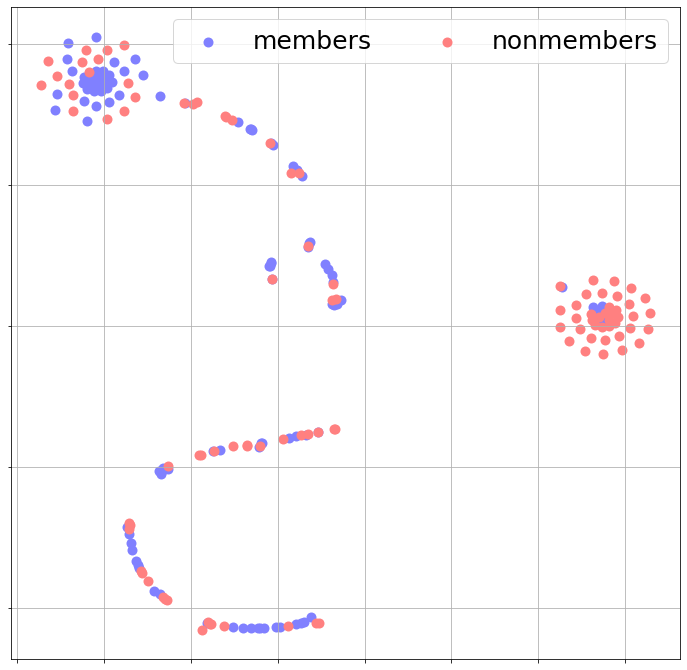

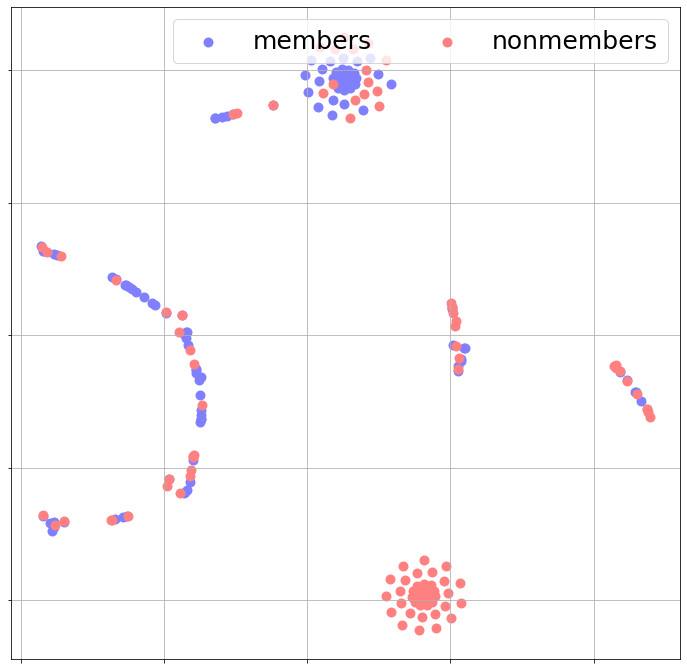

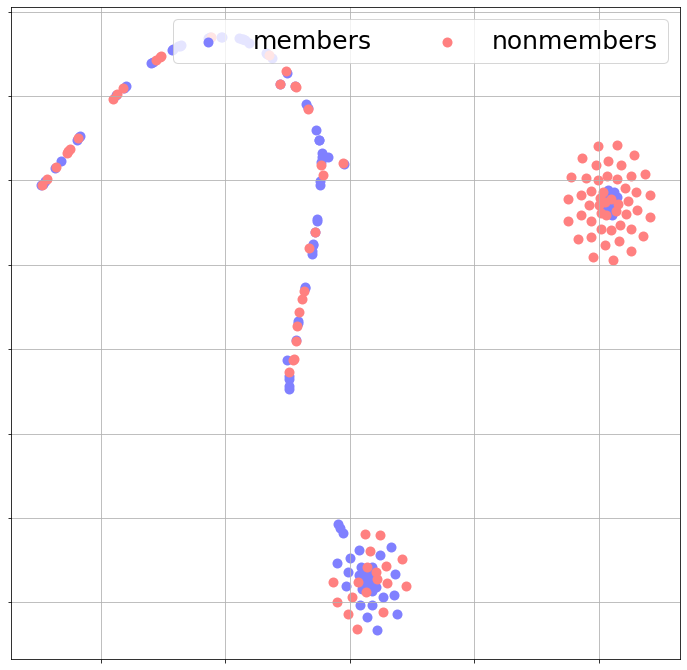

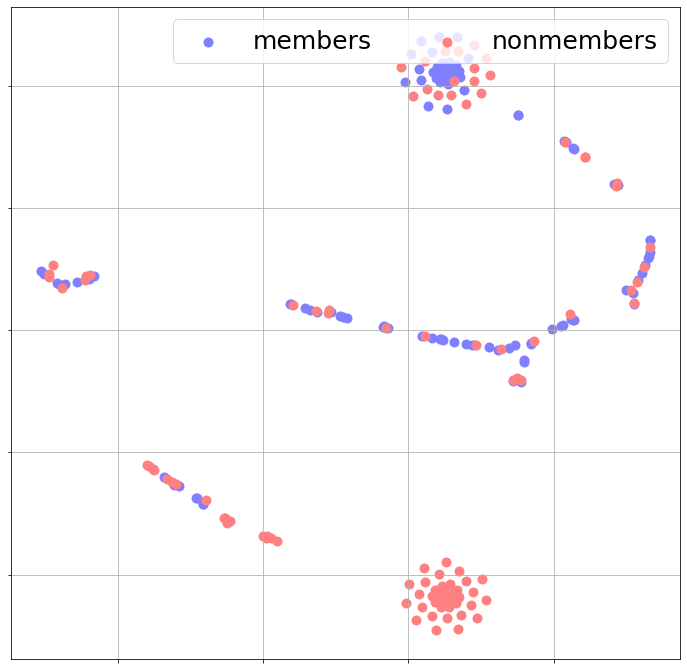

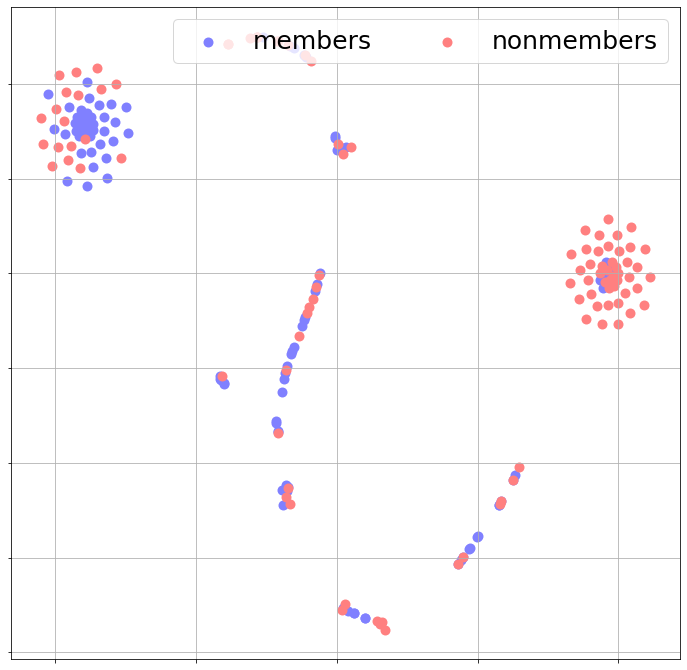

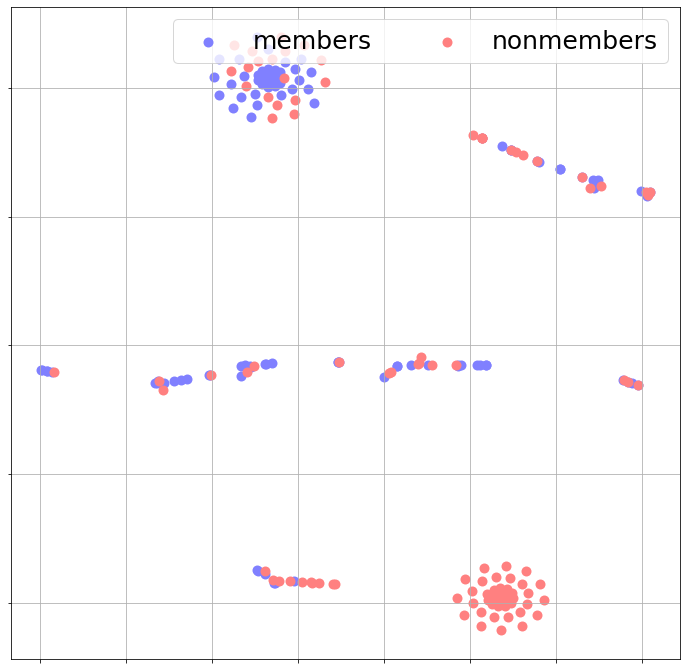

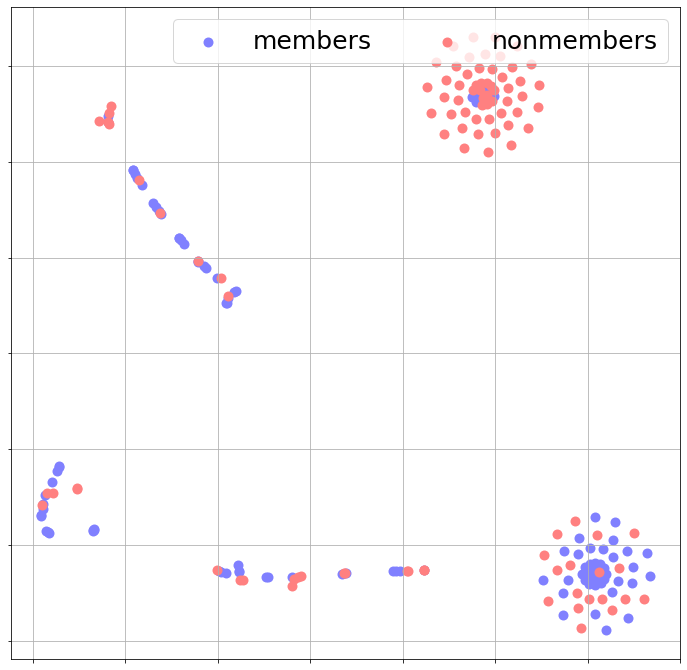

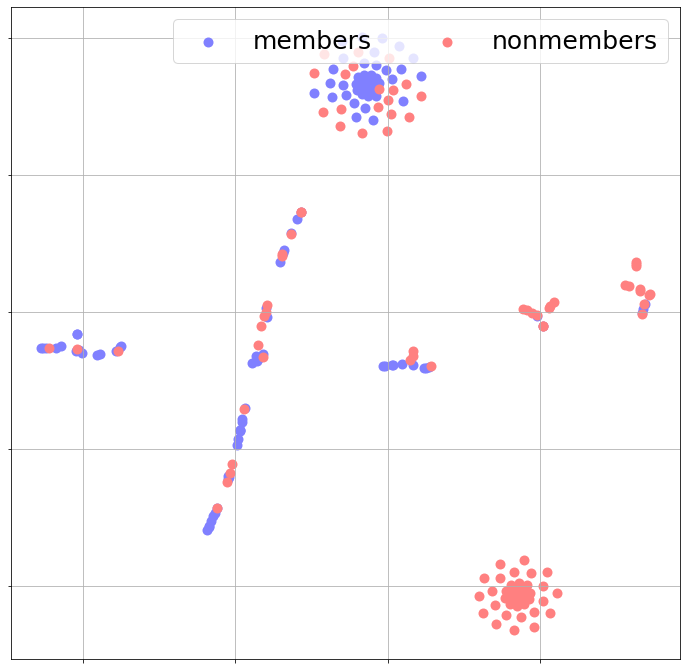

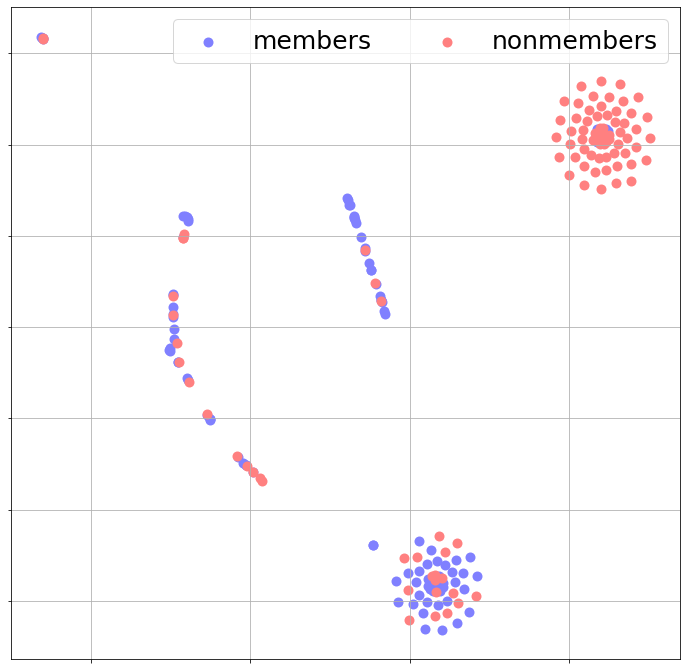

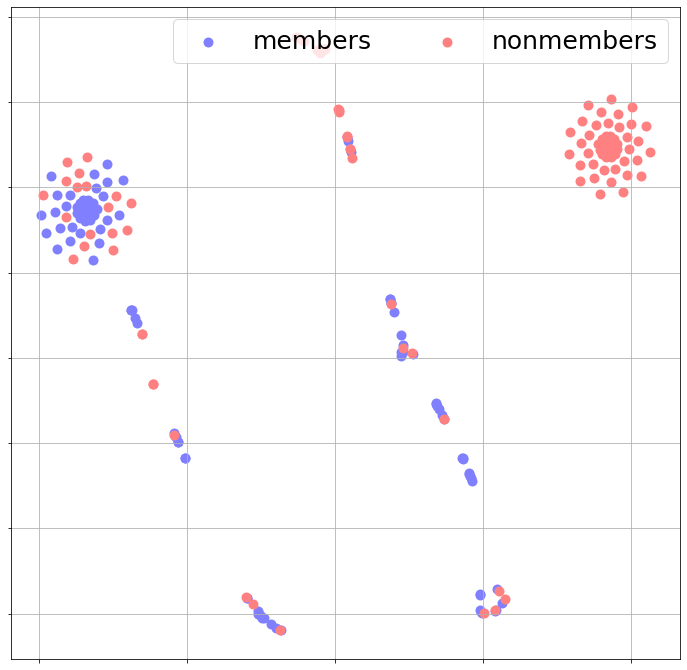

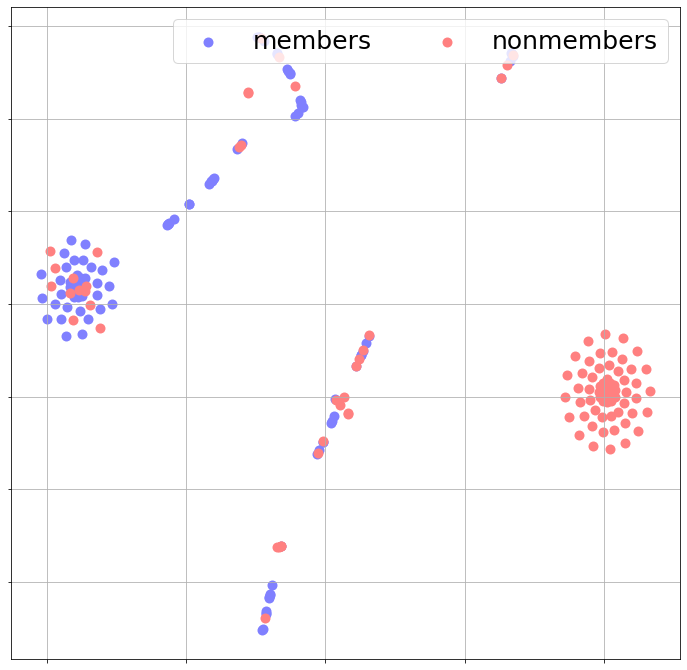

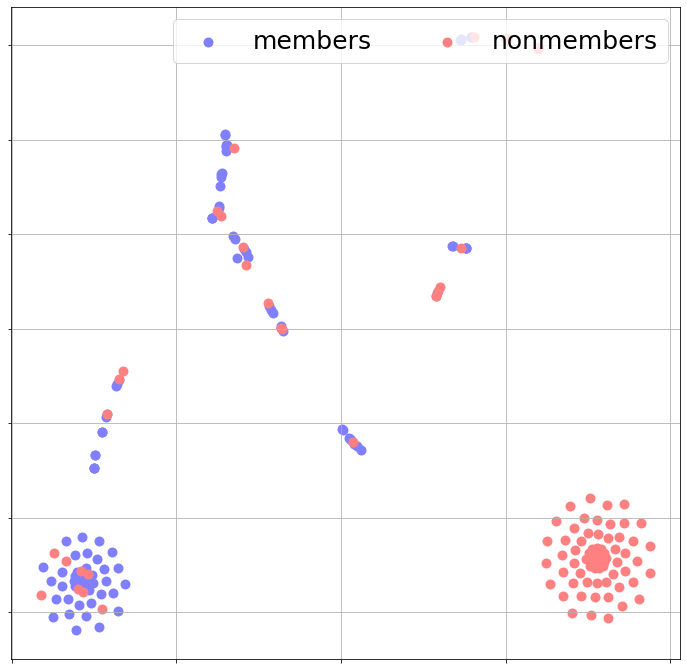

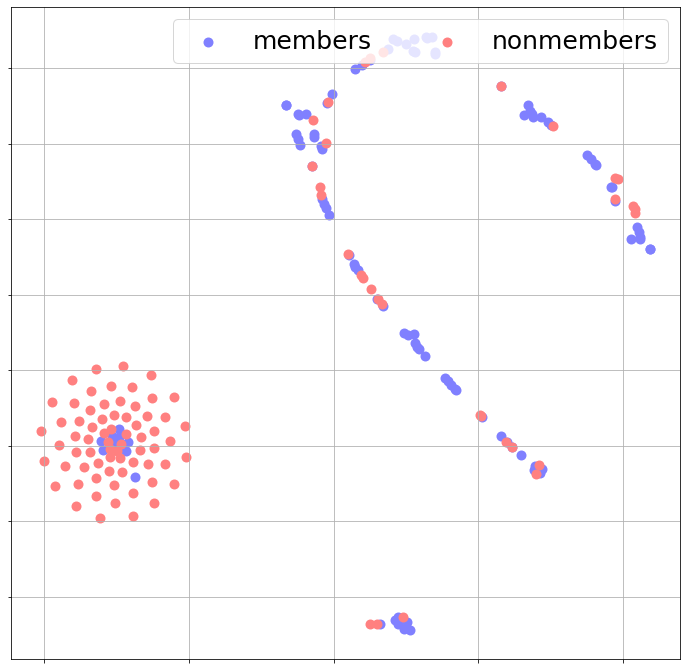

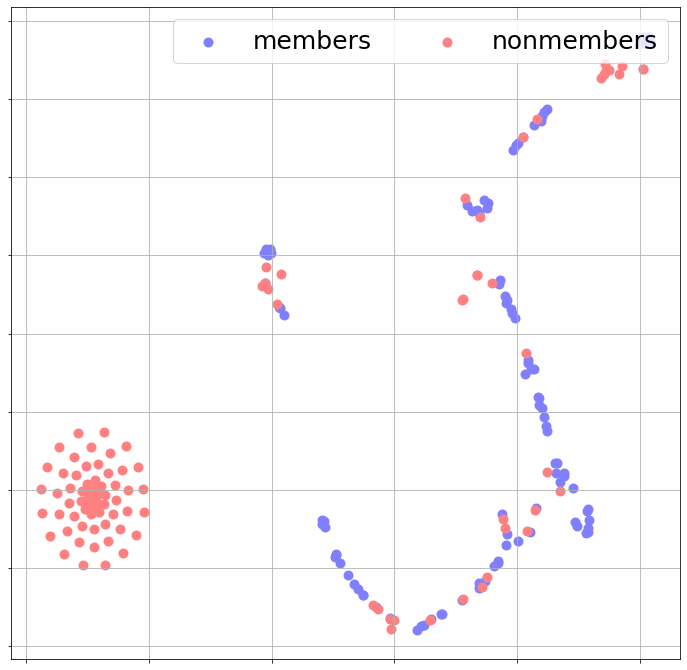

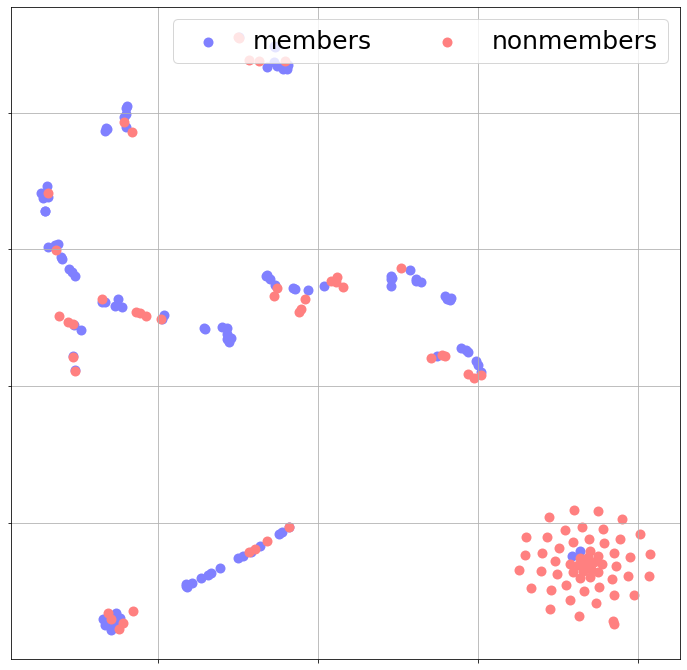

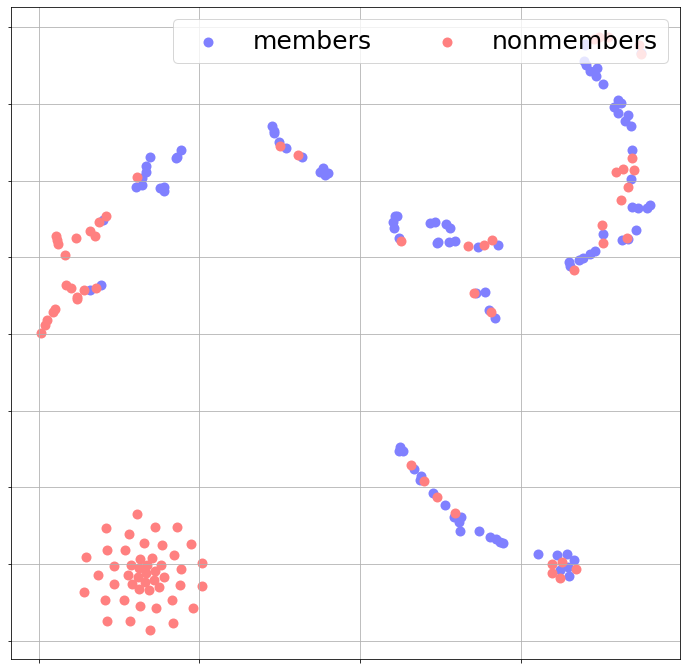

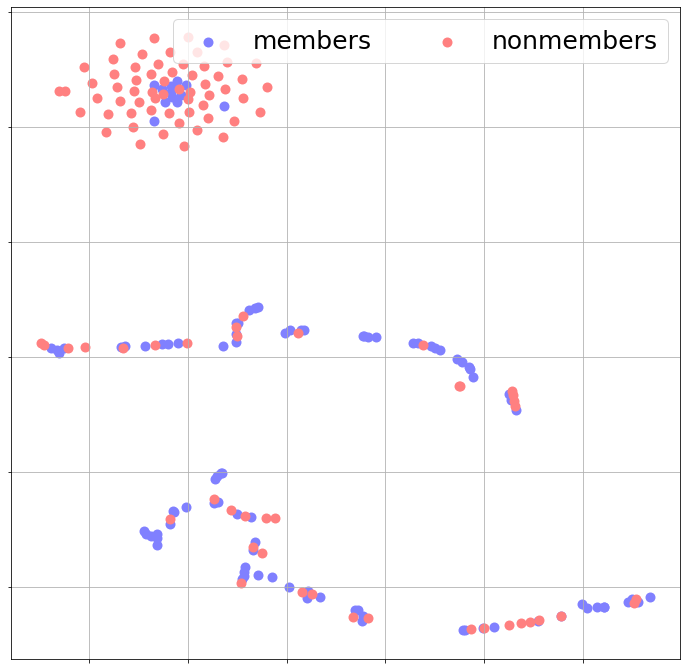

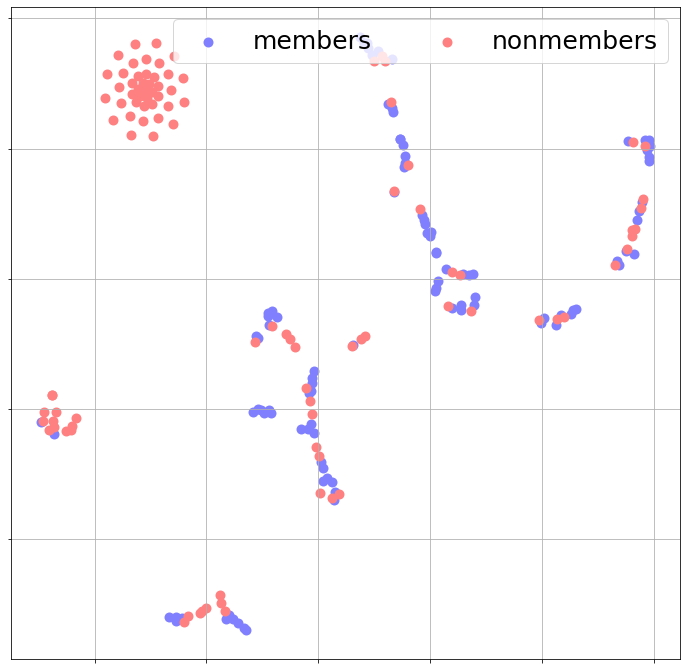

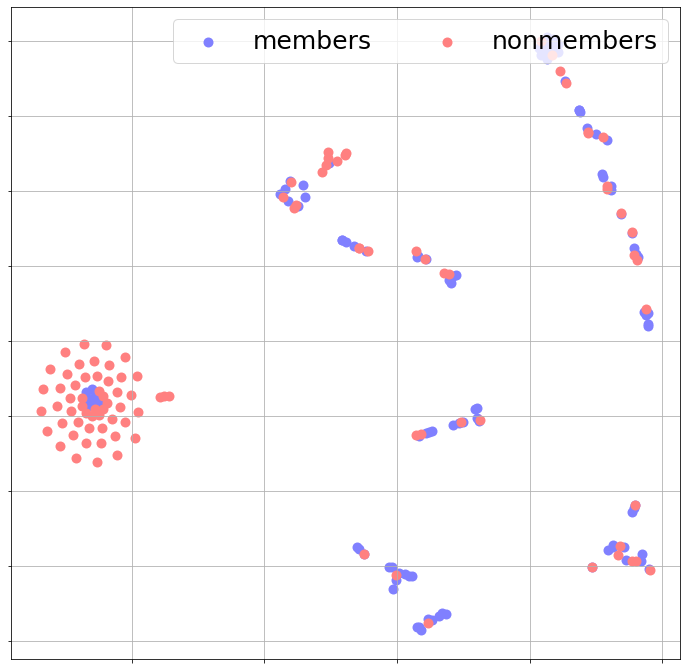

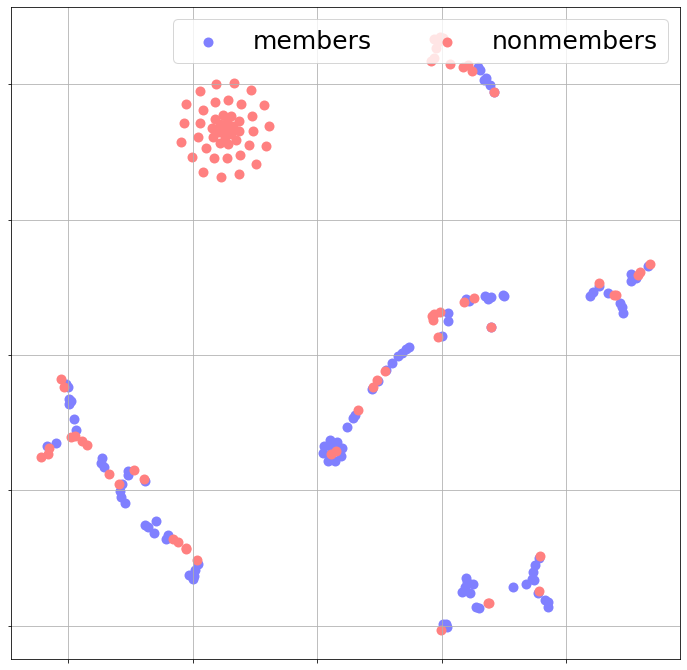

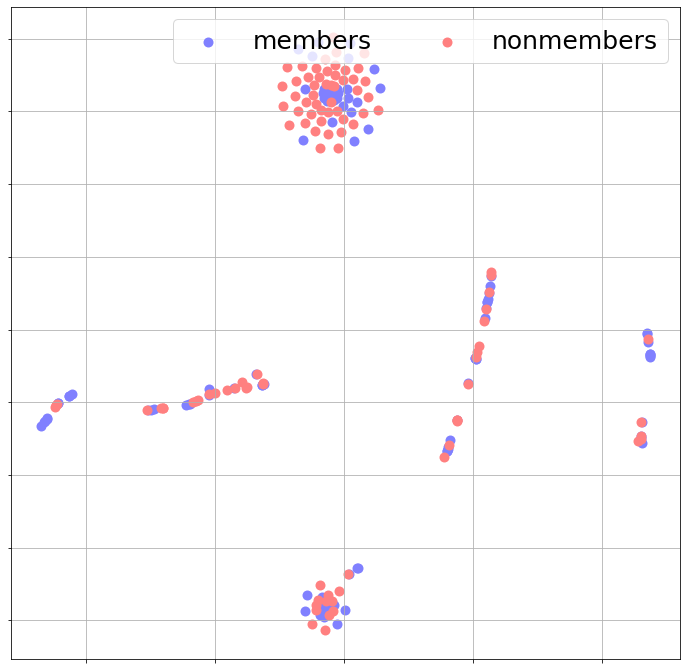

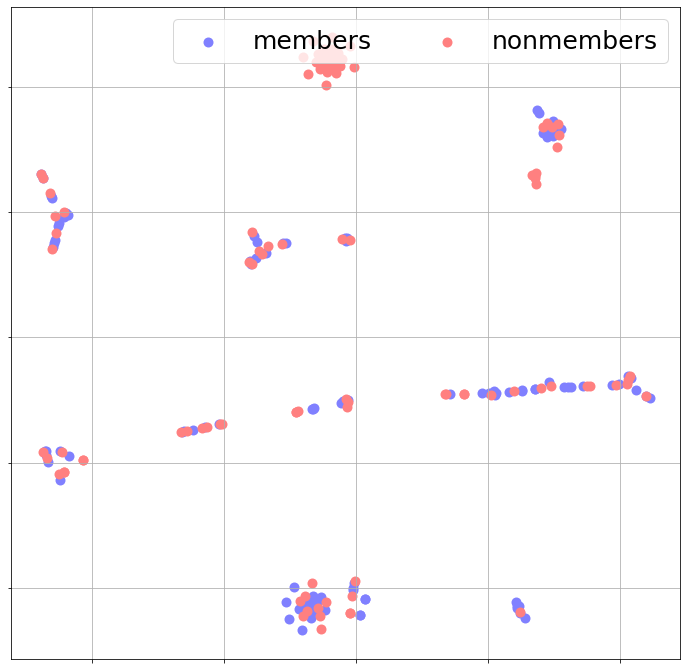

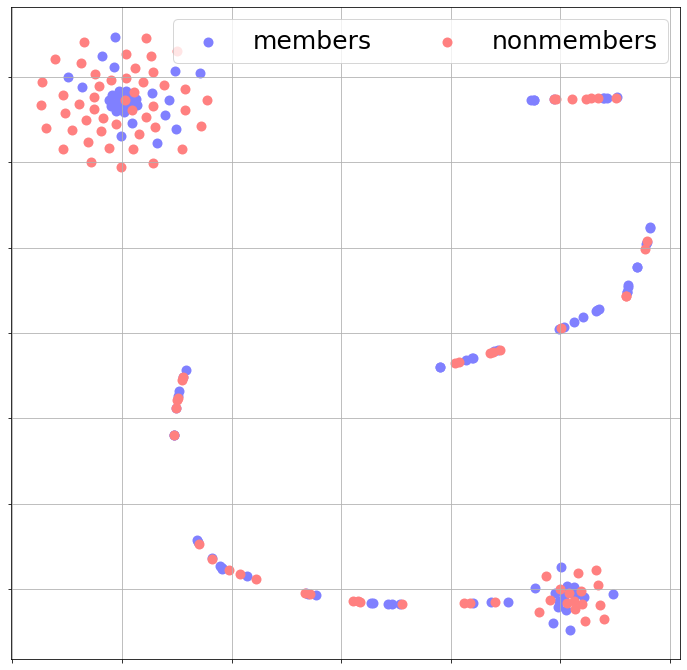

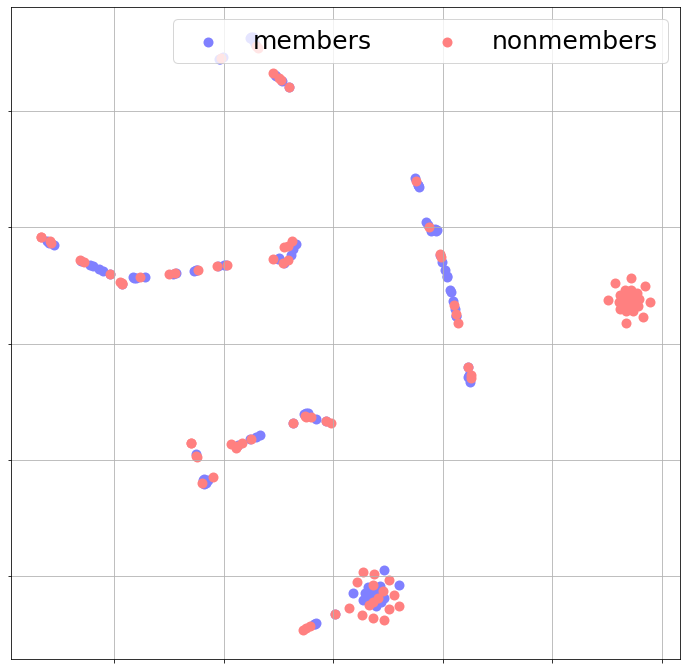

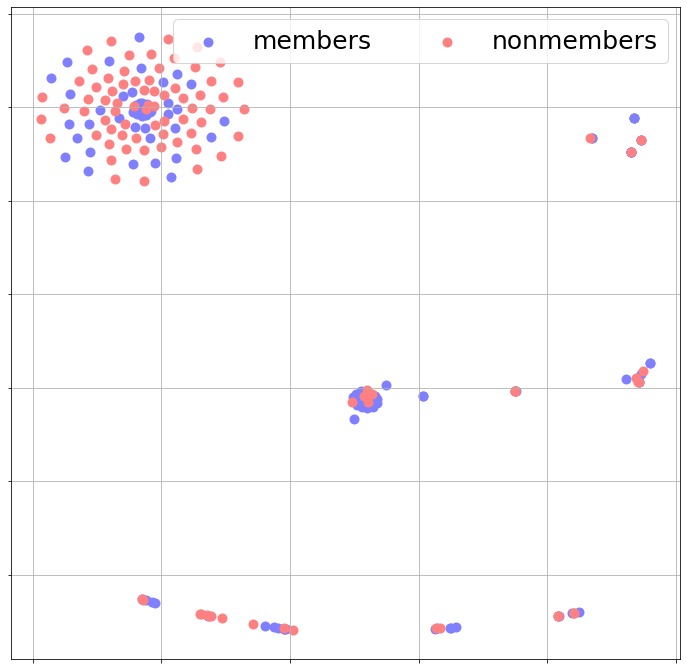

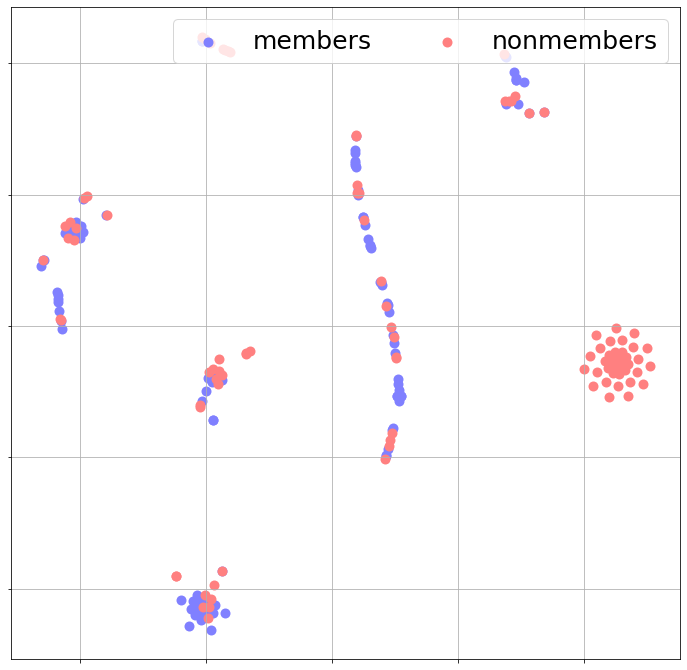

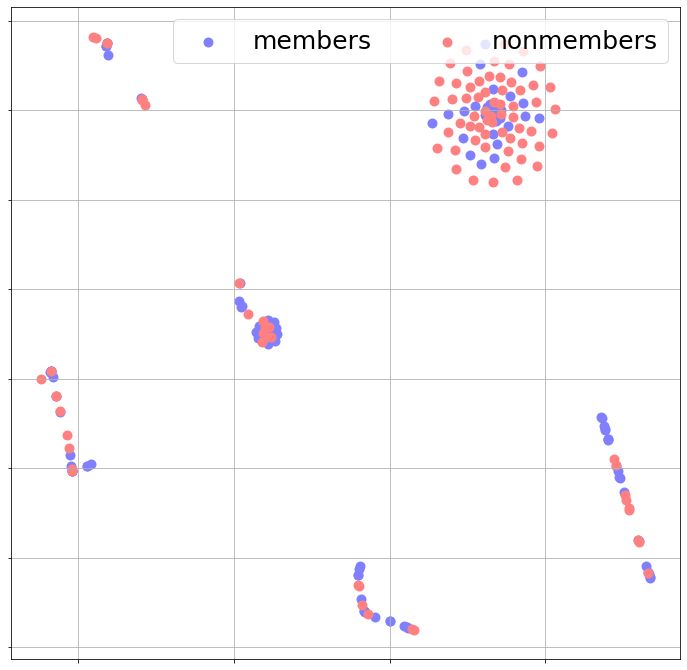

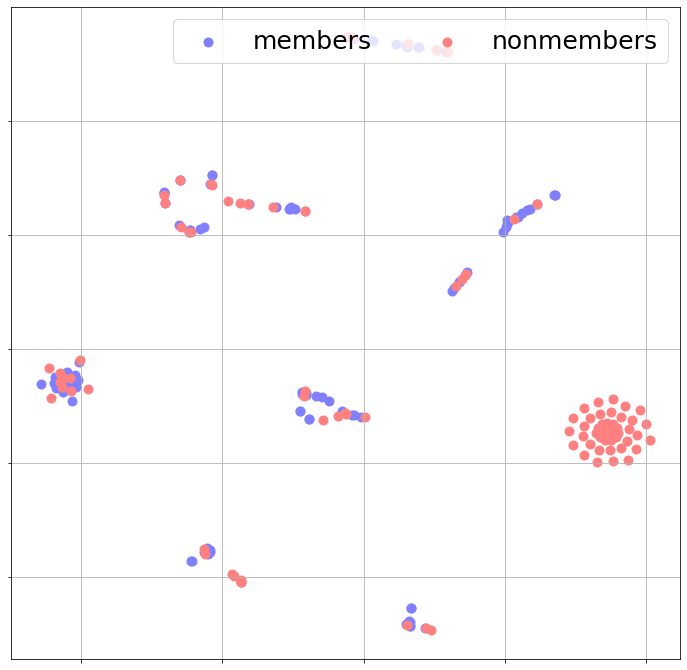

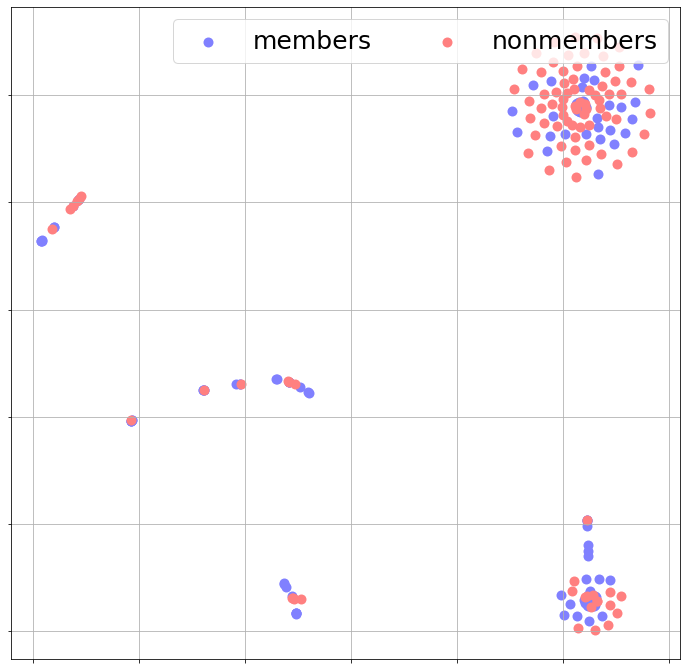

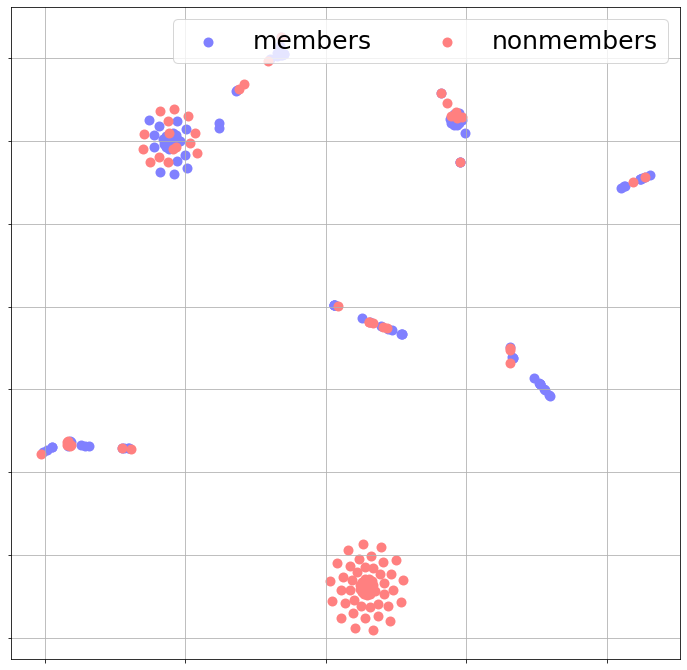

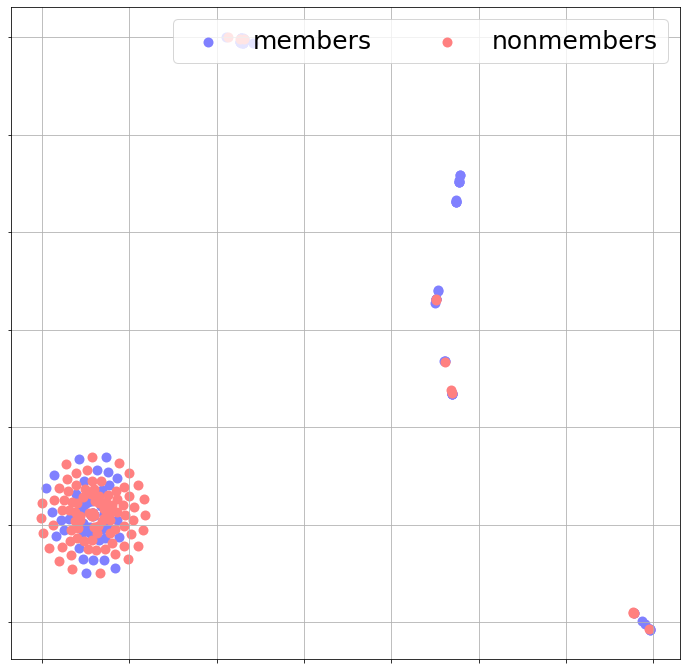

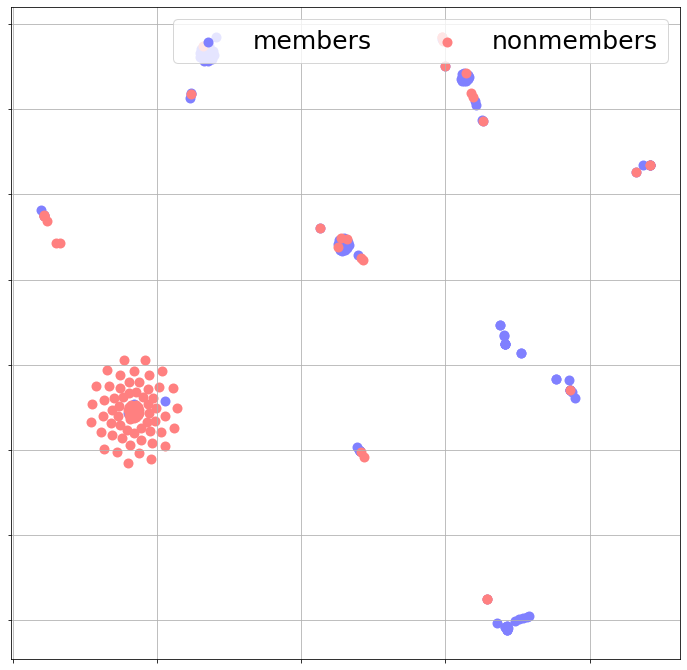

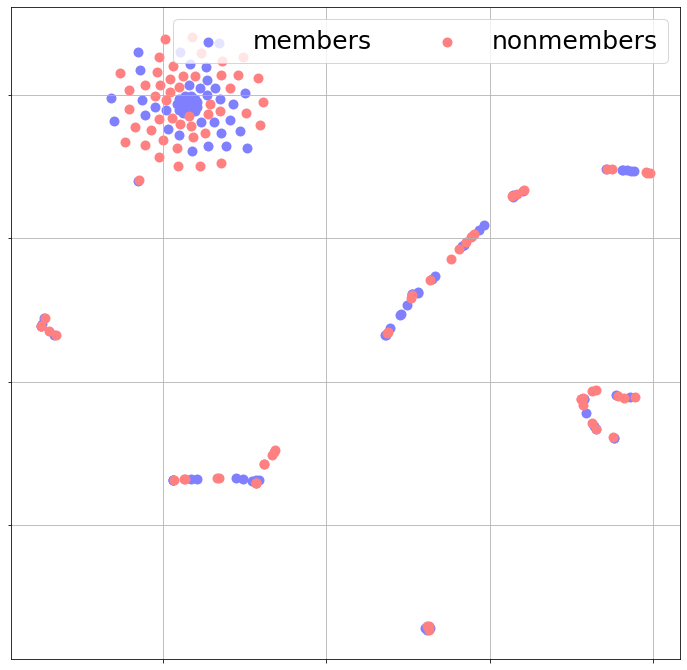

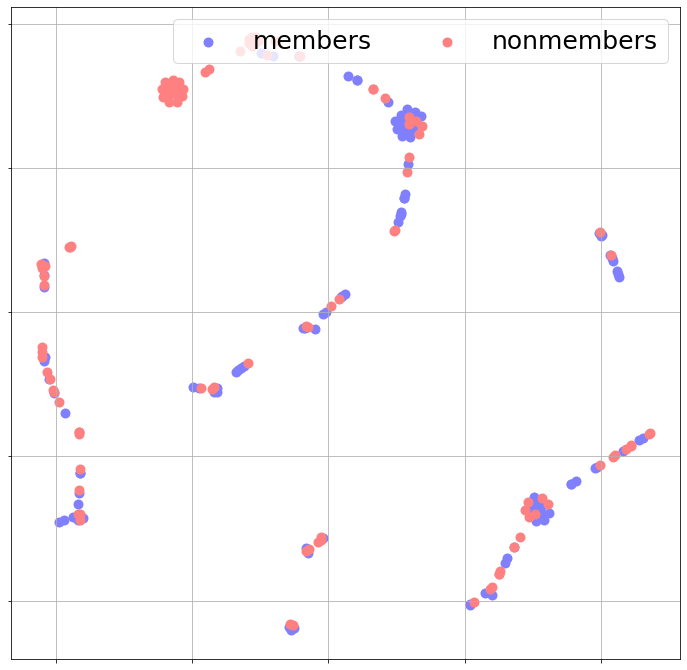

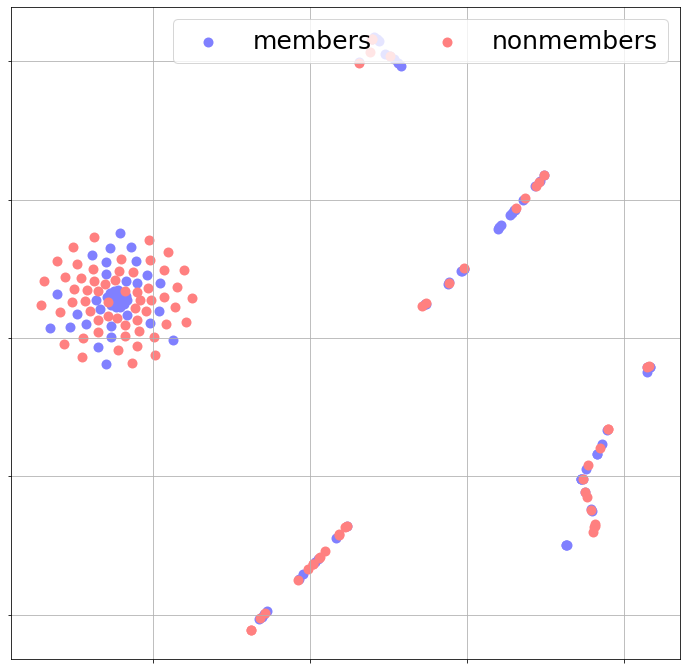

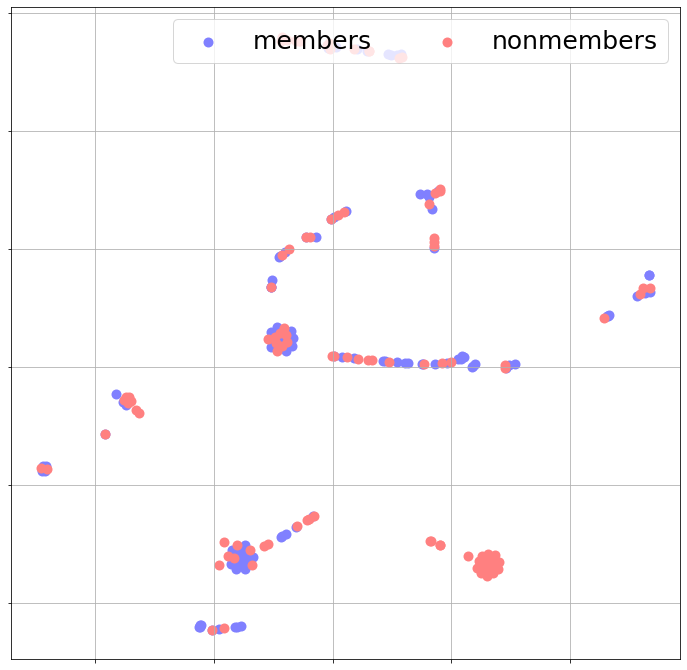

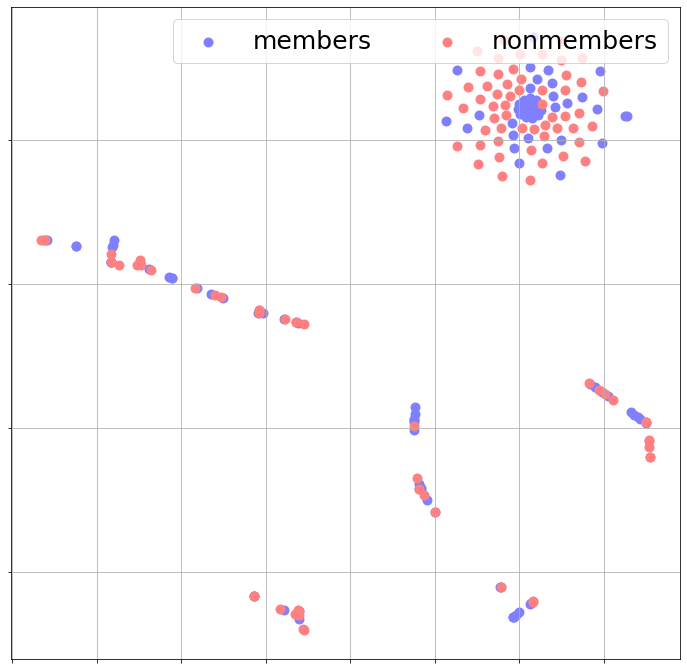

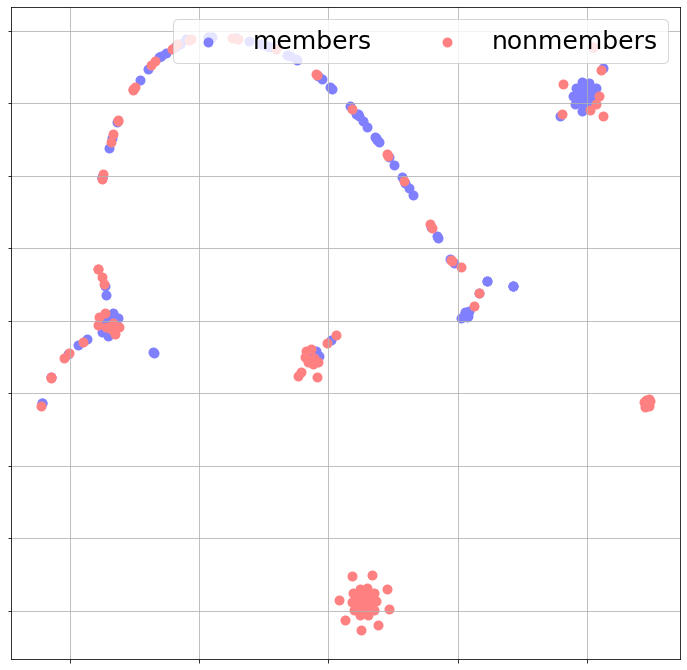

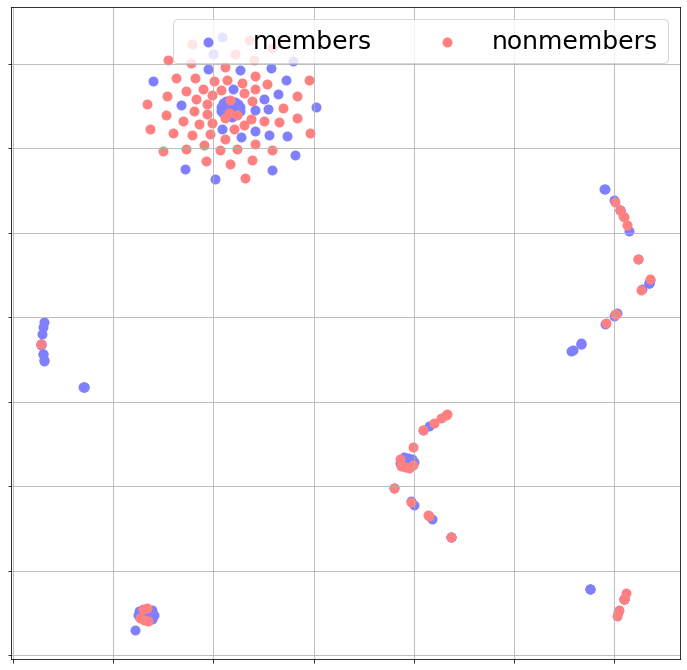

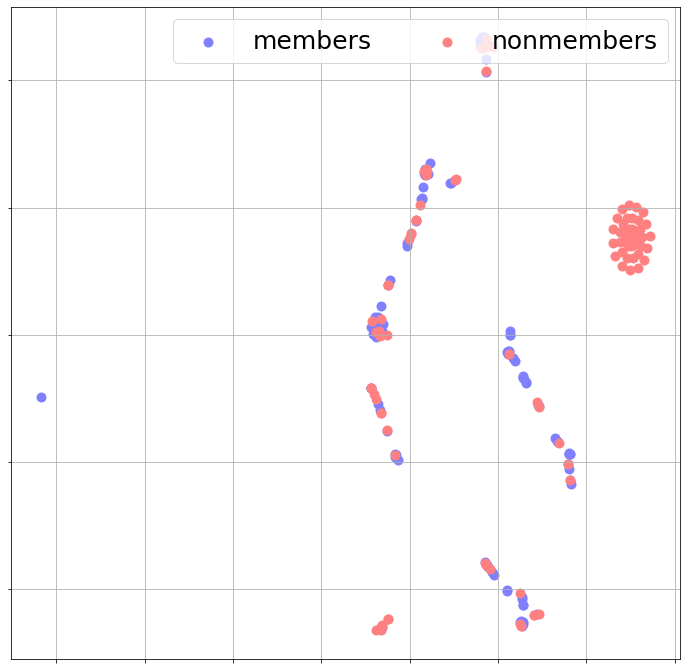

In [44]:
### Attack t-SNE for attack g
from sklearn.decomposition import PCA,KernelPCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25})

datsets=['CIFAR10','CIFAR100','GTSRB', 'Face']
datasetID=0
clusters=[[ 3000, 2000, 1500, 1000,500, 100],   
            [15000, 25000, 35000, 40000 ], 
            [600, 500, 400, 300, 200,100 ],      
            [1400, 1000, 700, 300  ]]

sigmas=[0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,  0.08,  0.1]
maxsamples=8

# reducer = umap.UMAP(n_neighbors=5,min_dist=0.05,n_components=2)
# reducer = KernelPCA(n_components=2,kernel='rbf')
reducer = TSNE(n_components=2,perplexity=5, verbose=1, random_state=123)

for datasetID in range(0,4):
    for cluster in clusters[datasetID]:
        x1,x2=[],[]
        for sigma in sigmas:
            pathadd='results/'+datsets[datasetID]+'/0.04/data_g_sigma_'+str(sigma)+'_'+str(cluster)+'.npy'
            #{'noise_target_in':noise_target_in, 'noise_target_out':noise_target_out}
            #num=[1, 5, 10, 20, 50,  100,  200, 500, 700, 1000] so 100 samples , 10 (nums)
            data=np.load(pathadd, allow_pickle=True)
            data=data.item()
            x1.append(np.array(data['noise_target_in'])[maxsamples,:])
            x2.append(np.array(data['noise_target_out'])[maxsamples,:])

        x1=np.array(x1)
        x2=np.array(x2)
        data_defense=np.concatenate((x1,x2), axis=1).transpose()
        data_defense = StandardScaler().fit_transform(data_defense)

        x1,x2=[],[]
        for sigma in sigmas:
            pathadd='results/'+datsets[datasetID]+'/adversaryTwo/NoDefensedata_g_sigma_'+str(sigma)+'_'+str(cluster)+'.npy'
            #{'noise_target_in':noise_target_in, 'noise_target_out':noise_target_out}
            #num=[1, 5, 10, 20, 50,  100,  200, 500, 700, 1000] so 100 samples , 10 (nums)
            data=np.load(pathadd, allow_pickle=True)
            data=data.item()
            x1.append(np.array(data['noise_target_in'])[maxsamples,:])
            x2.append(np.array(data['noise_target_out'])[maxsamples,:])
        x1=np.array(x1)
        x2=np.array(x2)    
        data_nodefense=np.concatenate((x1,x2), axis=1).transpose()
        data_nodefense = StandardScaler().fit_transform(data_nodefense)
        alpha=0.5


        principalComponents = reducer.fit_transform(data_defense)

        fig = plt.figure(figsize = (12,12))
        ax = fig.add_subplot( 1,1,1)#projection='3d'
        ax.scatter(principalComponents[:100,0],principalComponents[:100,1],  s=100, lw = 0, color=[ alpha, alpha, 1.])
        ax.scatter(principalComponents[100:,0],principalComponents[100:,1], s=100, lw = 0, color=[1., alpha, alpha])
        ax.legend(['members', 'nonmembers'],loc='upper right',ncol=2)
        #ax.set_title('LDL-0.04')
        ax.grid()
        ax.axes.yaxis.set_ticklabels([]) 
        ax.axes.xaxis.set_ticklabels([])
        fig.savefig('results/PCA/LDL_'+datsets[datasetID]+'_'+str(cluster)+'.png')
        fig.savefig('results/PCA/LDL_'+datsets[datasetID]+'_'+str(cluster)+'.pdf')


        principalComponents = reducer.fit_transform(data_nodefense)

        fig = plt.figure(figsize = (12,12))
        ax = fig.add_subplot( 1,1,1) #projection='3d'   1,1,1
        
        ax.scatter(principalComponents[:100,0],principalComponents[:100,1], s=100, lw = 0, color=[ alpha, alpha, 1.])
        ax.scatter(principalComponents[100:,0],principalComponents[100:,1],  s=100, lw = 0, color=[ 1.,alpha, alpha])
        ax.legend(['members', 'nonmembers'],loc='upper right',ncol=2)
        #ax.set_title('Naive')
        ax.axes.yaxis.set_ticklabels([]) 
        ax.axes.xaxis.set_ticklabels([])
        ax.grid()
        fig.savefig('results/PCA/Naive_'+datsets[datasetID]+'_'+str(cluster)+'.png')
        fig.savefig('results/PCA/Naive_'+datsets[datasetID]+'_'+str(cluster)+'.pdf')
        
    


(6, 5)
*** ['3000', '2000', '1500', '1000', '500', '100'] (6, 5)
  CIFAR10  MIA (Substitute)  MIA (Victim)  Gap Attack  LDL-0.02 (Substitute)  \
0    3000             0.860         0.795      0.6650                  0.720   
1    2000             0.865         0.760      0.6845                  0.730   
2    1500             0.850         0.845      0.6960                  0.765   
3    1000             0.875         0.820      0.7340                  0.760   
4     500             0.895         0.845      0.7540                  0.765   
5     100             0.945         0.910      0.8125                  0.870   

    LDL-0.02 (Victim)  
0               0.720  
1               0.730  
2               0.765  
3               0.760  
4               0.765  
5               0.870  
saved to  results/figs/shadow_CCS_ACC_CIFAR10
(4, 5)
*** ['40000', '35000', '25000', '15000'] (4, 5)
  CIFAR100  MIA (Substitute)  MIA (Victim)  Gap Attack  LDL-0.02 (Substitute)  \
0    40000             0

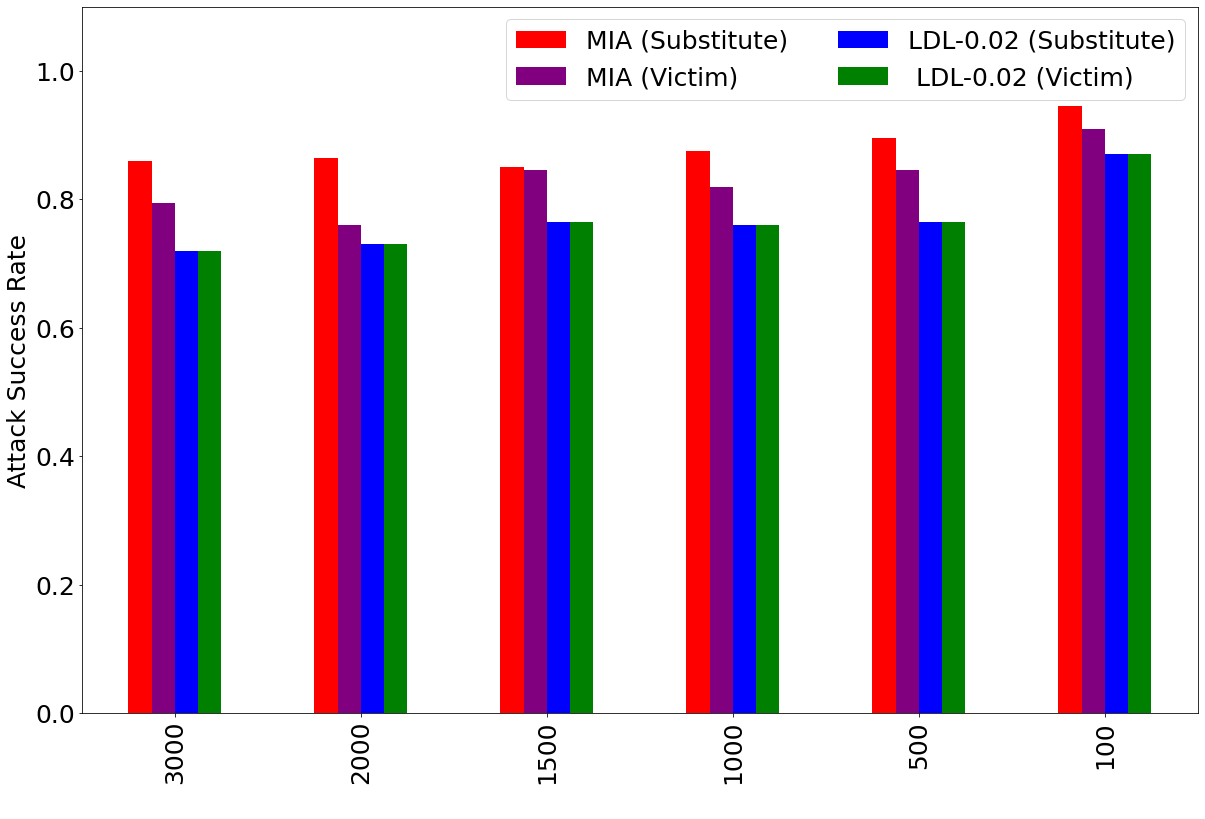

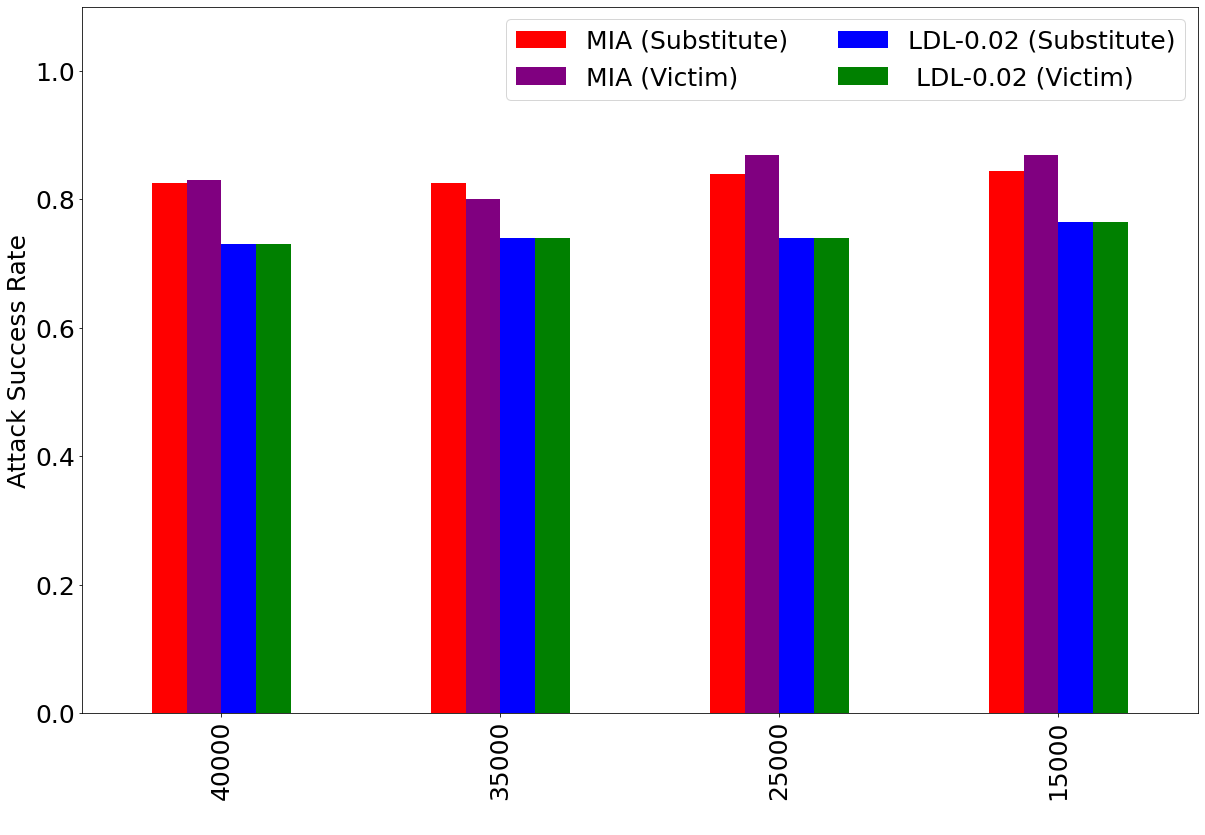

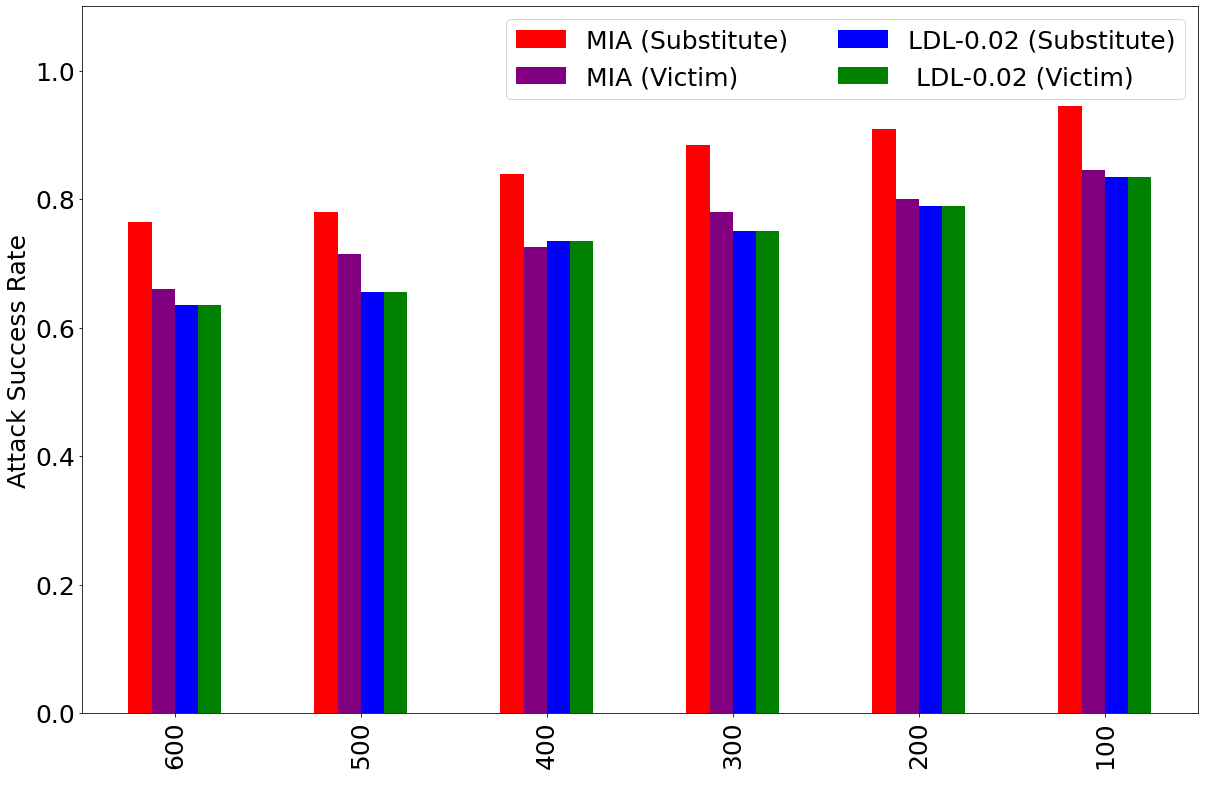

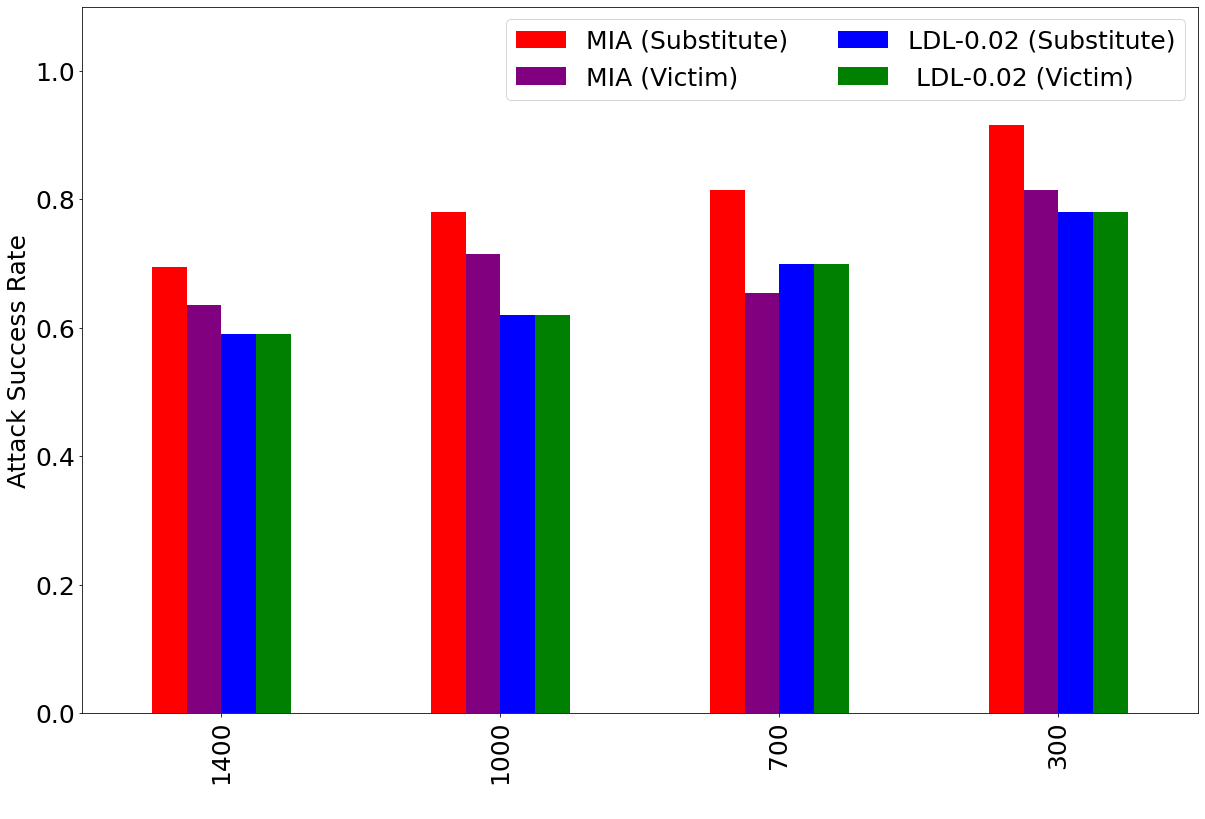

In [15]:
## CCS attack - Accuracy for Shadow model
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score

def max_accuracy(y_true, probs, threshold= None):
    max_accuracy_threshold= None
    if threshold == None: 
        fpr, tpr, thresholds = roc_curve(y_true, probs)
        accuracy_scores = []
        for thresh in thresholds:
            accuracy_scores.append(accuracy_score(y_true, [m > thresh for m in probs]))

        accuracies = np.array(accuracy_scores)
        max_accuracy = accuracies.max() 
        max_accuracy_threshold =  thresholds[accuracies.argmax()]
    else:
        max_accuracy= accuracy_score(y_true, [m > threshold for m in probs])
    return max_accuracy, max_accuracy_threshold

datsets=['CIFAR10','CIFAR100','GTSRB', 'Face']
# datasetID=0
# label_knnowledge=False

clusters=[[ 3000, 2000, 1500, 1000,500, 100],   
            [15000, 25000, 35000, 40000 ], 
            [600, 500, 400, 300, 200,100 ],      
            [1400, 1000, 700, 300  ]] 

prefix=''
label_knnowledge=False
for datasetID in [0,1,2,3]:
    #Loading Baseline attack accuracies
    filepath='results/'+datsets[datasetID]+'/target/NoDefenseaccuracy_'+str(datasetID)+'.npy'
    baseline=np.load(filepath,allow_pickle=True)
    baseline=baseline.item()
    
    #Loading shadow accuracies without defense
    filepath='results/'+datsets[datasetID]+'/adversaryTwo/NoDefenseDistance_'+'shadow_'+prefix+'HopSkipJump.csv'
    shadow_data_nodefense  = pd.read_csv(filepath)
    
    #Loading target accuracies without defense
    filepath='results/'+datsets[datasetID]+'/adversaryTwo/NoDefenseDistance_'+prefix+'HopSkipJump.csv'
    target_data_nodefense  = pd.read_csv(filepath)

    target_accuracy_nodef=[]
    shadow_accuracy_nodef = []
    for cl in clusters[datasetID]:
        x=shadow_data_nodefense[shadow_data_nodefense.DataSize ==cl]
        mem=x[x.Status=='Member']['L2Distance'].to_numpy()
        if  isinstance( mem[0],str):
            mem=[float(k.replace('[','').replace(']','')) for k in mem]
        x=shadow_data_nodefense[shadow_data_nodefense.DataSize ==cl]
        nonmem=x[x.Status=='Non-member']['L2Distance'].to_numpy()
        if  isinstance( nonmem[0],str):
            nonmem=[float(k.replace('[','').replace(']','')) for k in nonmem]

        acc,best_thresold=max_accuracy(np.array([1]*len(mem)+[0]*len(nonmem)), np.array(list(mem)+list(nonmem)))
        shadow_accuracy_nodef.append(acc)
        
        x=target_data_nodefense[target_data_nodefense.DataSize ==cl]
        mem=x[x.Status=='Member']['L2Distance'].to_numpy()
        if  isinstance( mem[0],str):
            mem=[float(k.replace('[','').replace(']','')) for k in mem]
        x=target_data_nodefense[target_data_nodefense.DataSize ==cl]
        nonmem=x[x.Status=='Non-member']['L2Distance'].to_numpy()
        if  isinstance( nonmem[0],str):
            nonmem=[float(k.replace('[','').replace(']','')) for k in nonmem]
        acc,_=max_accuracy(np.array([1]*len(mem)+[0]*len(nonmem)), np.array(list(mem)+list(nonmem)),best_thresold)
        target_accuracy_nodef.append(acc)

    #Loading shadow accuracies with defense
    filepath='results/'+datsets[datasetID]+'/adversaryTwo/Distance_'+'shadow_'+prefix+'HopSkipJump.csv'
    shadow_data_withdefense  = pd.read_csv(filepath)
    #Loading shadow accuracies with defense
    filepath='results/'+datsets[datasetID]+'/adversaryTwo/Distance_'+prefix+'HopSkipJump.csv'
    target_data_withdefense  = pd.read_csv(filepath)
    
    target_accuracy_withdef=[]
    shadow_accuracy_withdef = []
    for cl in clusters[datasetID]:
        x=shadow_data_withdefense[shadow_data_withdefense.DataSize ==cl]
        mem=x[x.Status=='Member']['L2Distance'].to_numpy()
        if  isinstance( mem[0],str):
            mem=[float(k.replace('[','').replace(']','')) for k in mem]
        x=shadow_data_withdefense[shadow_data_withdefense.DataSize ==cl]
        nonmem=x[x.Status=='Non-member']['L2Distance'].to_numpy()
        if  isinstance( nonmem[0],str):
            nonmem=[float(k.replace('[','').replace(']','')) for k in nonmem]

        acc,bestthreshold=max_accuracy(np.array([1]*len(mem)+[0]*len(nonmem)), np.array(list(mem)+list(nonmem)))
        shadow_accuracy_withdef.append(acc)
        
        x=shadow_data_withdefense[shadow_data_withdefense.DataSize ==cl]
        mem=x[x.Status=='Member']['L2Distance'].to_numpy()
        if  isinstance( mem[0],str):
            mem=[float(k.replace('[','').replace(']','')) for k in mem]
        x=shadow_data_withdefense[shadow_data_withdefense.DataSize ==cl]
        nonmem=x[x.Status=='Non-member']['L2Distance'].to_numpy()
        if  isinstance( nonmem[0],str):
            nonmem=[float(k.replace('[','').replace(']','')) for k in nonmem]

        acc,_=max_accuracy(np.array([1]*len(mem)+[0]*len(nonmem)), np.array(list(mem)+list(nonmem)),bestthreshold)
        target_accuracy_withdef.append(acc)


    
    baseline_acc= (np.array(baseline['train_acc'])+ (1-np.array( baseline['test_acc'])))/2.0
    legends=['MIA (Substitute)', 'MIA (Victim)','Gap Attack' ,'LDL-0.02 (Substitute)',' LDL-0.02 (Victim)']
        

    data= np.array([shadow_accuracy_nodef,target_accuracy_nodef ,shadow_accuracy_withdef, target_accuracy_withdef,baseline_acc]).transpose()
    print(data.shape)
    if datasetID ==1:
        data=data[[3,2,1,0],:]
        clusters[1]=[40000 ,35000,25000,15000 ]
    labels=[str(int(k)) for k in clusters[datasetID]]
    #(data, labels, Xaxis_label,pathadd, legends=['Naive','SEAD', 'Baseline']):
    plot_groupde_bar(data[:,[0,1,4,2,3]], labels, datsets[datasetID],'results/figs/shadow_CCS_ACC_'+prefix+datsets[datasetID],legends=legends)